C:\Users\82104\AppData\Local\Temp\ipykernel_40992\2599132607.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({
C:\Users\82104\AppData\Local\Temp\ipykernel_40992\2599132607.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['L_BR_FQ'] = df['L_BR_FQ'].astype(str).str.strip().replace({
C:\Users\82104\AppData\Local\Temp\ipykernel_40992\2599132607.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

사용자의 생활습관 수치를 입력해주세요.

홍길동님은 수축기 혈압 140.0, 이완기 혈압 90.0를 고려했을 때 HE_HP2 = 4, 고혈압에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 고혈압 그룹의 3번 군집에 속합니다.

✅ 사용자 생활습관 vs 군집 평균 비교 (고혈압):
| 항목                   |   홍길동님 수치 |   군집 3 평균 수치 |
|:-----------------------|----------------:|-------------------:|
| 1주일 간 음주 빈도     |            4.00 |               4.07 |
| 하루 평균 흡연량       |            3.00 |               2.27 |
| 1주일 간 걷기 일수     |            4.00 |               4.60 |
| 1주 동안 아침식사 빈도 |            3.00 |               2.79 |


c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


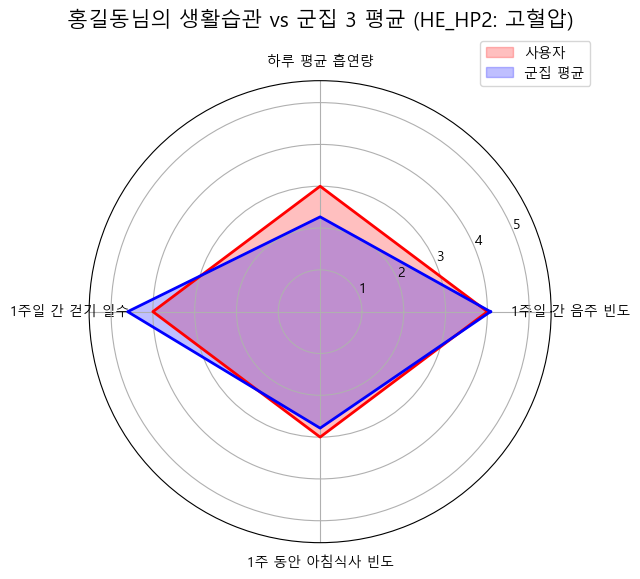


홍길동님은 공복혈당 99.0를 고려했을 때 HE_DM_HbA1c2 = 1, 정상에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 정상 그룹의 0번 군집에 속합니다.

✅ 사용자 생활습관 vs 군집 평균 비교 (당뇨):
| 항목                   |   홍길동님 수치 |   군집 0 평균 수치 |
|:-----------------------|----------------:|-------------------:|
| 1주일 간 음주 빈도     |            4.00 |               3.46 |
| 하루 평균 흡연량       |            3.00 |               3.23 |
| 1주일 간 걷기 일수     |            4.00 |               3.09 |
| 1주 동안 아침식사 빈도 |            3.00 |               2.94 |


c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


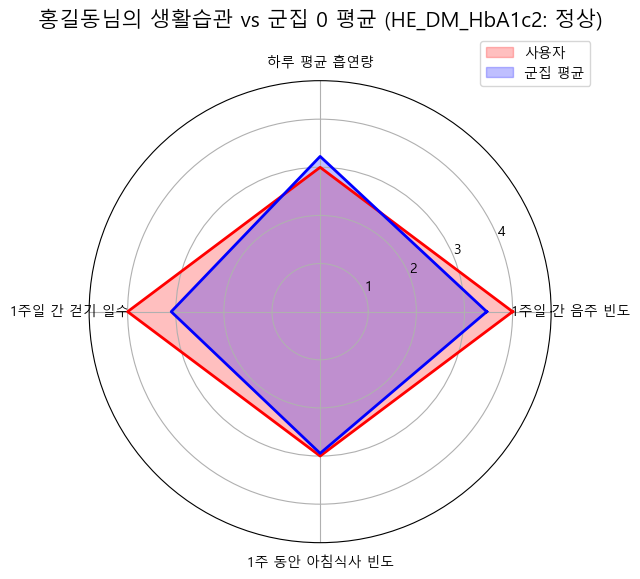


홍길동님은 BMI 29.0를 고려했을 때 HE_obe2 = 4, 비만에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 비만 그룹의 3번 군집에 속합니다.

✅ 사용자 생활습관 vs 군집 평균 비교 (비만):
| 항목                   |   홍길동님 수치 |   군집 3 평균 수치 |
|:-----------------------|----------------:|-------------------:|
| 1주일 간 음주 빈도     |            4.00 |               4.07 |
| 하루 평균 흡연량       |            3.00 |               2.27 |
| 1주일 간 걷기 일수     |            4.00 |               4.60 |
| 1주 동안 아침식사 빈도 |            3.00 |               2.79 |


c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


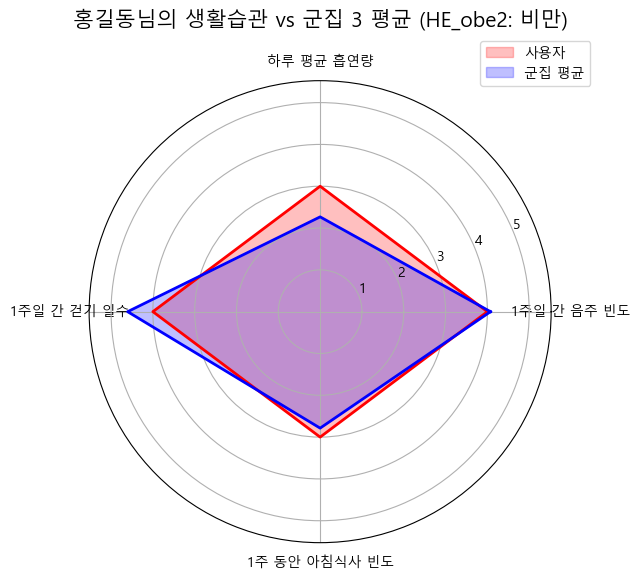

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from math import pi

# matplotlib 한국어 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 및 전처리
df = pd.read_csv("건강데이터_2022_2023_합본.csv")
df = df[(df['HE_glu'] >= 50) & (df['HE_glu'] <= 400)]

# 전처리: 1주일간 걷기 일수
df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({
    '1.0': 0, '2.0': 1, '3.0': 2, '4.0': 3, '5.0': 4, '6.0': 5, '7.0': 6, '8.0': 7,
    '88.0': 0, '99.0': np.nan, 'nan': np.nan
})
df['BE3_31'] = pd.to_numeric(df['BE3_31'], errors='coerce')

# 전처리: L_BR_FQ (최근 1년 동안 1주 동안 아침식사 빈도)
df['L_BR_FQ'] = df['L_BR_FQ'].astype(str).str.strip().replace({
    '1.0': 6, '2.0': 3.5, '3.0': 1.5, '4.0': 0, '9.0': np.nan, 'nan': np.nan
})
df['L_BR_FQ'] = pd.to_numeric(df['L_BR_FQ'], errors='coerce')

# 전처리: tobacco (일반 담배 + 전자 담배 하루 평균 흡연량)
df['BS3_2'] = df['BS3_2'].replace(888, 0)
df['BS12_47_1'] = df['BS12_47_1'].replace({888: 0, 999: np.nan})
df['BS3_2'] = pd.to_numeric(df['BS3_2'], errors='coerce')
df['BS12_47_1'] = pd.to_numeric(df['BS12_47_1'], errors='coerce')
df['tobacco'] = df[['BS3_2', 'BS12_47_1']].sum(axis=1, skipna=True)
df['tobacco'] = df['tobacco'].astype(str).str.strip().replace({'999.0': np.nan})
df['tobacco'] = pd.to_numeric(df['tobacco'], errors='coerce')

# 전처리: BD1_11 (1년간 음주빈도)
df['BD1_11'] = df['BD1_11'].astype(str).str.strip().replace({
    '1.0': 0, '2.0': 6, '3.0': 12, '4.0': 42, '5.0': 130, '6.0': 286,
    '8.0': 0, '9.0': np.nan, 'nan': np.nan
})
df['BD1_11'] = pd.to_numeric(df['BD1_11'], errors='coerce')

# 고혈압 파생변수 생성 (HE_HP2)
def determine_he_hp2(sbp, dbp):
    if pd.isna(sbp) or pd.isna(dbp):
        return np.nan
    if sbp >= 140 or dbp >= 90:
        return 4
    elif 130 <= sbp <= 139 or 80 <= dbp <= 89:
        return 3
    elif 120 <= sbp <= 129 and dbp < 80:
        return 2
    else:
        return 1

# 당뇨 파생변수 생성 (HE_DM_HbA1c2)
def determine_he_dm_hba1c2(glu):
    if pd.isna(glu):
        return np.nan
    if glu < 100:
        return 1
    elif 100 <= glu <= 125:
        return 2
    else:
        return 3

# 비만 파생변수 생성 (HE_obe2)
def determine_he_obe2(bmi):
    if bmi <= 18.5:
        return 1
    elif 18.5 < bmi <= 22.9:
        return 2
    elif 22.9 < bmi <= 24.9:
        return 3
    elif 24.9 < bmi <= 29.9:
        return 4
    elif 29.9 < bmi <= 34.9:
        return 5
    else:
        return 6

# 파생변수 적용
df['HE_HP2'] = df.apply(lambda row: determine_he_hp2(row['HE_sbp1'], row['HE_dbp1']), axis=1)
df['HE_DM_HbA1c2'] = df.apply(lambda row: determine_he_dm_hba1c2(row['HE_glu']), axis=1)
df['HE_obe2'] = df.apply(lambda row: determine_he_obe2(row['HE_BMI']), axis=1)
df['HE_HP2'] = pd.to_numeric(df['HE_HP2'], errors='coerce')
df['HE_DM_HbA1c2'] = pd.to_numeric(df['HE_DM_HbA1c2'], errors='coerce')
df['HE_obe2'] = pd.to_numeric(df['HE_obe2'], errors='coerce')

# 결측치 처리 및 데이터 준비
df_clustering = df.dropna(subset=['HE_HP2', 'HE_DM_HbA1c2', 'HE_obe2'])
selected_cols = ['BD1_11', 'tobacco', 'BE3_31', 'L_BR_FQ']

# 선택된 컬럼의 결측치를 최빈값으로 대체
for col in selected_cols:
    if df_clustering[col].isnull().any():
        mode_value = df_clustering[col].mode(dropna=True)
        if not mode_value.empty:
            df_clustering[col].fillna(mode_value[0], inplace=True)
        else:
            df_clustering[col].fillna(0, inplace=True)

# 사전 계산된 군집 평균 데이터
precalculated_means = {
    # 고혈압 (HE_HP2)
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [0.212965, 0.346154, 0.263829, 0.283081, 3.773973, 0.532374, 3.081522],
        '하루 평균 흡연량': [0.180919, 0.803408, 0.243425, 0.696676, 18.815068, 18.654676, 1.434783],
        '1주일 간 걷기 일수': [1.006360, 5.964613, 6.167879, 1.013850, 3.102740, 3.805755, 4.766304],
        '1주 동안 아침식사 빈도': [5.547703, 0.613368, 5.585898, 0.623269, 2.616438, 3.769784, 3.337862]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [3.257282, 0.600634, 0.173377, 0.227414, 0.761134, 5.500000, 1.003752],
        '하루 평균 흡연량': [0.582524, 0.444444, 0.102253, 0.382550, 23.385965, 6.716981, 13.719512],
        '1주일 간 걷기 일수': [5.291262, 3.584229, 6.287695, 1.201342, 1.666667, 2.660377, 6.024390],
        '1주 동안 아침식사 빈도': [5.432039, 0.605735, 5.757366, 5.692394, 3.789474, 3.924528, 3.152439]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.517830, 0.747283, 2.083208, 0.473159, 5.500000, 1.960664],
        '하루 평균 흡연량': [0.255906, 1.091078, 19.352941, 0.420361, 2.595745, 17.242424],
        '1주일 간 걷기 일수': [6.213583, 3.780669, 1.895425, 1.308703, 4.085106, 5.469697],
        '1주 동안 아침식사 빈도': [5.778543, 0.697026, 2.271242, 5.749589, 4.049645, 5.295455]
    }, index=[0, 1, 2, 3, 4, 5]),
    4: pd.DataFrame({
        '1주일 간 음주 빈도': [5.500000, 0.463656, 0.471816, 2.740812, 0.930769],
        '하루 평균 흡연량': [2.284672, 0.332907, 0.317814, 20.272222, 1.310000],
        '1주일 간 걷기 일수': [3.729927, 6.289373, 1.212551, 3.850000, 3.813333],
        '1주 동안 아침식사 빈도': [4.463504, 5.839949, 5.731781, 3.738889, 0.693333]
    }, index=[0, 1, 2, 3, 4]),
    # 당뇨 (HE_DM_HbA1c2)
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [3.462264, 0.056121, 0.347728, 0.147807, 1.490074, 0.463646],
        '하루 평균 흡연량': [3.226415, 0.073930, 0.485380, 0.297521, 19.774194, 0.698630],
        '1주일 간 걷기 일수': [3.094340, 0.443580, 6.187135, 0.719008, 3.967742, 5.945205],
        '1주 동안 아침식사 빈도': [2.943396, 5.659533, 5.576023, 0.619835, 3.064516, 0.534247]
    }, index=[0, 1, 2, 3, 4, 5]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [1.346814, 0.619275, 0.418860, 5.237327, 0.692170, 0.278670],
        '하루 평균 흡연량': [18.386266, 0.748092, 0.245912, 7.737327, 0.670251, 0.306064],
        '1주일 간 걷기 일수': [3.497854, 1.219466, 6.217444, 3.718894, 6.069892, 1.216554],
        '1주 동안 아침식사 빈도': [3.343348, 0.885496, 5.662326, 4.158986, 0.585125, 5.677575]
    }, index=[0, 1, 2, 3, 4, 5]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.428221, 0.465444, 1.405400, 0.733680, 5.500000],
        '하루 평균 흡연량': [0.353503, 0.406190, 19.929293, 0.981982, 5.000000],
        '1주일 간 걷기 일수': [1.168790, 6.233075, 3.691919, 3.645045, 4.143836],
        '1주 동안 아침식사 빈도': [5.685510, 5.787234, 3.845960, 0.740541, 4.191781]
    }, index=[0, 1, 2, 3, 4]),
    # 비만 (HE_obe2)
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [3.462264, 0.056121, 0.347728, 0.147807, 1.490074, 0.463646],
        '하루 평균 흡연량': [3.226415, 0.073930, 0.485380, 0.297521, 19.774194, 0.698630],
        '1주일 간 걷기 일수': [3.094340, 0.443580, 6.187135, 0.719008, 3.967742, 5.945205],
        '1주 동안 아침식사 빈도': [2.943396, 5.659533, 5.576023, 0.619835, 3.064516, 0.534247]
    }, index=[0, 1, 2, 3, 4, 5]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [1.346814, 0.619275, 0.418860, 5.237327, 0.692170, 0.278670],
        '하루 평균 흡연량': [18.386266, 0.748092, 0.245912, 7.737327, 0.670251, 0.306064],
        '1주일 간 걷기 일수': [3.497854, 1.219466, 6.217444, 3.718894, 6.069892, 1.216554],
        '1주 동안 아침식사 빈도': [3.343348, 0.885496, 5.662326, 4.158986, 0.585125, 5.677575]
    }, index=[0, 1, 2, 3, 4, 5]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.428221, 0.465444, 1.405400, 0.733680, 5.500000],
        '하루 평균 흡연량': [0.353503, 0.406190, 19.929293, 0.981982, 5.000000],
        '1주일 간 걷기 일수': [1.168790, 6.233075, 3.691919, 3.645045, 4.143836],
        '1주 동안 아침식사 빈도': [5.685510, 5.787234, 3.845960, 0.740541, 4.191781]
    }, index=[0, 1, 2, 3, 4]),
    4: pd.DataFrame({
        '1주일 간 음주 빈도': [1.745897, 0.476494, 0.474684, 4.074257, 0.400403],
        '하루 평균 흡연량': [20.120000, 0.413905, 0.444304, 2.267327, 0.994178],
        '1주일 간 걷기 일수': [3.673333, 6.226354, 1.289873, 4.603960, 3.608443],
        '1주 동안 아침식사 빈도': [3.465000, 5.767583, 5.724684, 2.785479, 0.788937]
    }, index=[0, 1, 2, 3, 4]),
    5: pd.DataFrame({
        '1주일 간 음주 빈도': [0.313474, 0.188658, 1.018219, 4.313953, 0.697115, 2.906780, 0.266827],
        '하루 평균 흡연량': [0.215686, 0.218978, 17.921053, 3.069767, 23.687500, 2.000000, 1.331250],
        '1주일 간 걷기 일수': [6.202614, 1.160584, 3.368421, 2.488372, 3.781250, 4.915254, 3.893750],
        '1주 동안 아침식사 빈도': [5.722222, 5.635036, 5.605263, 5.174419, 0.984375, 0.838983, 0.659375]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    6: pd.DataFrame({
        '1주일 간 음주 빈도': [0.202830, 5.500000, 0.407692, 0.332308, 1.230769],
        '하루 평균 흡연량': [0.198113, 7.692308, 0.642857, 0.400000, 20.360000],
        '1주일 간 걷기 일수': [0.424528, 5.230769, 3.942857, 6.480000, 3.840000],
        '1주 동안 아침식사 빈도': [5.787736, 4.730769, 0.600000, 5.625000, 3.480000]
    }, index=[0, 1, 2, 3, 4])
}

# 사용자 입력 함수
def get_user_input():
    print("사용자의 생활습관 수치를 입력해주세요.")
    name = input("사용자 이름: ")
    sbp = float(input("수축기 혈압 (mmHg): "))
    dbp = float(input("이완기 혈압 (mmHg): "))
    glu = float(input("공복혈당 (mg/dL): "))
    bmi = float(input("BMI: "))
    weekly_alcohol = float(input("1주일 간 음주 빈도 (회): "))
    daily_smoking = float(input("하루 평균 흡연량 (개비): "))
    weekly_exercise = float(input("1주일 간 걷기 일수 (회): "))
    daily_veg = float(input("1주 동안 아침식사 빈도 (회): "))
    return name, sbp, dbp, glu, bmi, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg

# 군집 결정 함수 (사전 계산된 평균 사용)
def determine_cluster_with_precalculated_means(user_data_weekly_daily, dm_value, scaler, precalculated_means_dict, selected_cols):
    dm_value_int = int(dm_value)

    if dm_value_int not in precalculated_means_dict:
        print(f"사전 계산된 군집 평균 데이터에 {dm_value_int} 그룹이 없습니다.")
        return None, None

    cluster_means_precalculated_text_names = precalculated_means_dict[dm_value_int].copy()

    text_to_internal_col_mapping = {
        '1주일 간 음주 빈도': 'BD1_11',
        '하루 평균 흡연량': 'tobacco',
        '1주일 간 걷기 일수': 'BE3_31',
        '1주 동안 아침식사 빈도': 'L_BR_FQ'
    }

    cluster_means_precalculated_internal_names = pd.DataFrame(index=cluster_means_precalculated_text_names.index)
    for internal_col in selected_cols:
        text_col = next((k for k, v in text_to_internal_col_mapping.items() if v == internal_col), None)
        if text_col and text_col in cluster_means_precalculated_text_names.columns:
            cluster_means_precalculated_internal_names[internal_col] = cluster_means_precalculated_text_names[text_col]
        else:
            print(f"경고: 내부 컬럼 '{internal_col}'에 대한 텍스트 이름 매핑이 없거나 사전 계산된 데이터에 없습니다.")
            cluster_means_precalculated_internal_names[internal_col] = np.nan

    if cluster_means_precalculated_internal_names.isnull().values.any():
        print("경고: 스케일링하려는 사전 계산된 평균 데이터에 결측치가 포함되어 있습니다.")
        return None, None

    scaled_precalculated_centroids = scaler.transform(cluster_means_precalculated_internal_names[selected_cols])

    user_data_transformed_for_predict = [
        user_data_weekly_daily[0] * 52,  # 주간 음주 -> 연간 음주
        user_data_weekly_daily[1],       # 하루 흡연
        user_data_weekly_daily[2],       # 주간 걷기
        user_data_weekly_daily[3]        # 아침식사
    ]

    user_data_scaled_for_predict = scaler.transform([user_data_transformed_for_predict])

    distances = np.linalg.norm(scaled_precalculated_centroids - user_data_scaled_for_predict, axis=1)
    closest_cluster = np.argmin(distances)
    cluster_means = precalculated_means_dict[dm_value_int].iloc[closest_cluster]

    return closest_cluster, cluster_means

# 레이더 차트 생성 함수
def plot_radar_chart(user_data_weekly_daily, cluster_mean_weekly_daily, categories, title):
    values_user = user_data_weekly_daily[:]
    values_cluster = cluster_mean_weekly_daily[:]
    all_values = values_user + values_cluster
    max_val = max(all_values) if all_values else 1

    values_user = values_user + values_user[:1]
    values_cluster = values_cluster + values_cluster[:1]
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_ylim(0, max_val * 1.2)
    ax.fill(angles, values_user, color='red', alpha=0.25, label='사용자')
    ax.plot(angles, values_user, color='red', linewidth=2)
    ax.fill(angles, values_cluster, color='blue', alpha=0.25, label='군집 평균')
    ax.plot(angles, values_cluster, color='blue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(title, size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    ax.grid(True)
    plt.show()

# 메인 서비스 함수
def health_comparison_service():
    name, sbp, dbp, glu, bmi, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg = get_user_input()

    # 고혈압 분류
    he_hp2 = determine_he_hp2(sbp, dbp)
    he_hp2_labels = {1: "정상", 2: "주의", 3: "고혈압 전단계", 4: "고혈압"}
    if pd.isna(he_hp2):
        print(f"\n혈압 수치 ({sbp}/{dbp})가 유효하지 않아 HE_HP2 분류를 할 수 없습니다.")
    else:
        he_hp2_int = int(he_hp2)
        if he_hp2_int not in precalculated_means:
            print(f"\nHE_HP2 그룹 {he_hp2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        else:
            print(f"\n{name}님은 수축기 혈압 {sbp}, 이완기 혈압 {dbp}를 고려했을 때 HE_HP2 = {he_hp2_int}, {he_hp2_labels[he_hp2_int]}에 속합니다.")
            hp_df = df_clustering[df_clustering['HE_HP2'] == he_hp2_int][selected_cols].copy()
            if hp_df.empty:
                print(f"\nHE_HP2 그룹 {he_hp2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            else:
                scaler = StandardScaler()
                scaler.fit(hp_df[selected_cols])
                user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                cluster, cluster_means = determine_cluster_with_precalculated_means(
                    user_data_for_cluster_input, he_hp2_int, scaler, precalculated_means, selected_cols
                )
                if cluster is not None:
                    print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 {he_hp2_labels[he_hp2_int]} 그룹의 {cluster}번 군집에 속합니다.")
                    print("\n✅ 사용자 생활습관 vs 군집 평균 비교 (고혈압):")
                    user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                    cluster_comp_values = cluster_means.tolist()
                    item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '1주 동안 아침식사 빈도']
                    table_data = {
                        '항목': item_names,
                        f'{name}님 수치': user_values,
                        f'군집 {cluster} 평균 수치': cluster_comp_values
                    }
                    comparison_df = pd.DataFrame(table_data)
                    print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
                    plot_radar_chart(user_values, cluster_comp_values, item_names,
                                  f"{name}님의 생활습관 vs 군집 {cluster} 평균 (HE_HP2: {he_hp2_labels[he_hp2_int]})")

    # 당뇨 분류
    he_dm_hba1c2 = determine_he_dm_hba1c2(glu)
    he_dm_hba1c2_labels = {1: "정상", 2: "당뇨 전단계", 3: "당뇨"}
    if pd.isna(he_dm_hba1c2):
        print(f"\n공복혈당 수치 ({glu})가 유효하지 않아 HE_DM_HbA1c2 분류를 할 수 없습니다.")
    else:
        he_dm_hba1c2_int = int(he_dm_hba1c2)
        if he_dm_hba1c2_int not in precalculated_means:
            print(f"\nHE_DM_HbA1c2 그룹 {he_dm_hba1c2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        else:
            print(f"\n{name}님은 공복혈당 {glu}를 고려했을 때 HE_DM_HbA1c2 = {he_dm_hba1c2_int}, {he_dm_hba1c2_labels[he_dm_hba1c2_int]}에 속합니다.")
            dm_df = df_clustering[df_clustering['HE_DM_HbA1c2'] == he_dm_hba1c2_int][selected_cols].copy()
            if dm_df.empty:
                print(f"\nHE_DM_HbA1c2 그룹 {he_dm_hba1c2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            else:
                scaler = StandardScaler()
                scaler.fit(dm_df[selected_cols])
                user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                cluster, cluster_means = determine_cluster_with_precalculated_means(
                    user_data_for_cluster_input, he_dm_hba1c2_int, scaler, precalculated_means, selected_cols
                )
                if cluster is not None:
                    print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 {he_dm_hba1c2_labels[he_dm_hba1c2_int]} 그룹의 {cluster}번 군집에 속합니다.")
                    print("\n✅ 사용자 생활습관 vs 군집 평균 비교 (당뇨):")
                    user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                    cluster_comp_values = cluster_means.tolist()
                    item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '1주 동안 아침식사 빈도']
                    table_data = {
                        '항목': item_names,
                        f'{name}님 수치': user_values,
                        f'군집 {cluster} 평균 수치': cluster_comp_values
                    }
                    comparison_df = pd.DataFrame(table_data)
                    print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
                    plot_radar_chart(user_values, cluster_comp_values, item_names,
                                  f"{name}님의 생활습관 vs 군집 {cluster} 평균 (HE_DM_HbA1c2: {he_dm_hba1c2_labels[he_dm_hba1c2_int]})")

    # 비만 분류
    he_obe2 = determine_he_obe2(bmi)
    he_obe2_labels = {1: "저체중", 2: "정상", 3: "과체중", 4: "비만", 5: "고도 비만", 6: "초고도 비만"}
    if pd.isna(he_obe2):
        print(f"\nBMI 수치 ({bmi})가 유효하지 않아 HE_obe2 분류를 할 수 없습니다.")
    else:
        he_obe2_int = int(he_obe2)
        if he_obe2_int not in precalculated_means:
            print(f"\nHE_obe2 그룹 {he_obe2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        else:
            print(f"\n{name}님은 BMI {bmi}를 고려했을 때 HE_obe2 = {he_obe2_int}, {he_obe2_labels[he_obe2_int]}에 속합니다.")
            obe_df = df_clustering[df_clustering['HE_obe2'] == he_obe2_int][selected_cols].copy()
            if obe_df.empty:
                print(f"\nHE_obe2 그룹 {he_obe2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            else:
                scaler = StandardScaler()
                scaler.fit(obe_df[selected_cols])
                user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                cluster, cluster_means = determine_cluster_with_precalculated_means(
                    user_data_for_cluster_input, he_obe2_int, scaler, precalculated_means, selected_cols
                )
                if cluster is not None:
                    print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 {he_obe2_labels[he_obe2_int]} 그룹의 {cluster}번 군집에 속합니다.")
                    print("\n✅ 사용자 생활습관 vs 군집 평균 비교 (비만):")
                    user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                    cluster_comp_values = cluster_means.tolist()
                    item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '1주 동안 아침식사 빈도']
                    table_data = {
                        '항목': item_names,
                        f'{name}님 수치': user_values,
                        f'군집 {cluster} 평균 수치': cluster_comp_values
                    }
                    comparison_df = pd.DataFrame(table_data)
                    print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
                    plot_radar_chart(user_values, cluster_comp_values, item_names,
                                  f"{name}님의 생활습관 vs 군집 {cluster} 평균 (HE_obe2: {he_obe2_labels[he_obe2_int]})")

# 서비스 실행
if __name__ == "__main__":
    health_comparison_service()

C:\Users\82104\AppData\Local\Temp\ipykernel_40992\509606124.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({
C:\Users\82104\AppData\Local\Temp\ipykernel_40992\509606124.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['L_BR_FQ'] = df['L_BR_FQ'].astype(str).str.strip().replace({
C:\Users\82104\AppData\Local\Temp\ipykernel_40992\509606124.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the

사용자의 생활습관 수치를 입력해주세요.

홍길ㄷㅇ님은 수축기 혈압 140.0, 이완기 혈압 88.0를 고려했을 때 HE_HP2 = 4, 고혈압에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 고혈압 그룹의 3번 군집에 속합니다.

✅ 사용자 생활습관 vs 추천 군집 평균 비교 (고혈압):
| 항목                   |   홍길ㄷㅇ님 수치 |   추천 군집 1 평균 수치 |
|:-----------------------|------------------:|------------------------:|
| 1주일 간 음주 빈도     |              4.00 |                    0.48 |
| 하루 평균 흡연량       |              3.00 |                    0.41 |
| 1주일 간 걷기 일수     |              4.00 |                    6.23 |
| 1주 동안 아침식사 빈도 |              4.00 |                    5.77 |


c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


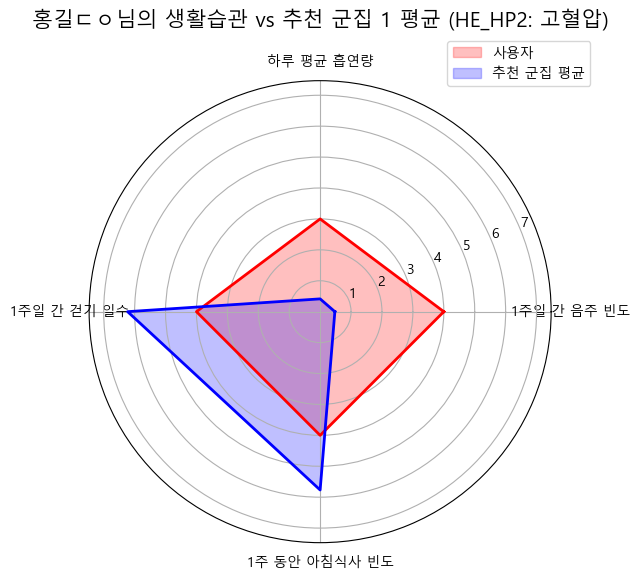

이 수치에 도달하려면 음주와 흡연을 줄이고, 걷기와 아침식사 빈도를 늘리면 고혈압 전단계로 개선될 가능성이 있습니다!

홍길ㄷㅇ님은 공복혈당 87.0를 고려했을 때 HE_DM_HbA1c2 = 1, 정상에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 정상 그룹의 0번 군집에 속합니다.

✅ 사용자 생활습관 vs 추천 군집 평균 비교 (당뇨):
| 항목                   |   홍길ㄷㅇ님 수치 |   추천 군집 2 평균 수치 |
|:-----------------------|------------------:|------------------------:|
| 1주일 간 음주 빈도     |              4.00 |                    0.35 |
| 하루 평균 흡연량       |              3.00 |                    0.49 |
| 1주일 간 걷기 일수     |              4.00 |                    6.19 |
| 1주 동안 아침식사 빈도 |              4.00 |                    5.58 |


c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


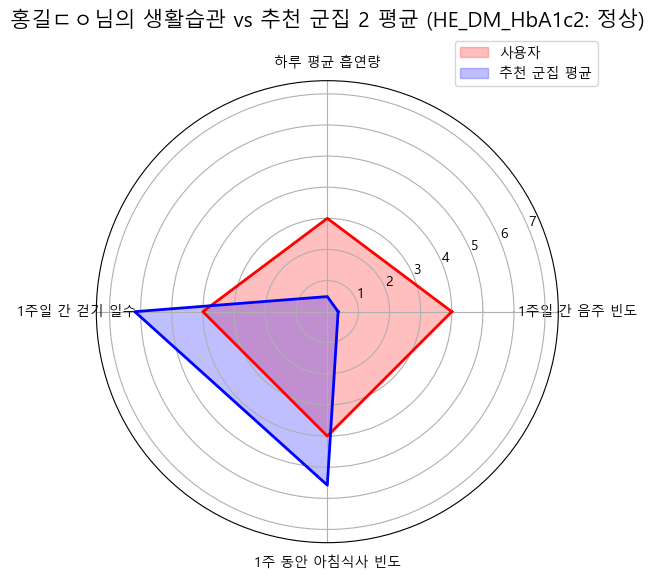

이 수치에 도달하려면 음주와 흡연을 줄이고, 걷기와 아침식사 빈도를 늘리면 정상로 개선될 가능성이 있습니다!

홍길ㄷㅇ님은 BMI 29.0를 고려했을 때 HE_obe2 = 4, 비만에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 비만 그룹의 3번 군집에 속합니다.

✅ 사용자 생활습관 vs 추천 군집 평균 비교 (비만):
| 항목                   |   홍길ㄷㅇ님 수치 |   추천 군집 1 평균 수치 |
|:-----------------------|------------------:|------------------------:|
| 1주일 간 음주 빈도     |              4.00 |                    0.48 |
| 하루 평균 흡연량       |              3.00 |                    0.41 |
| 1주일 간 걷기 일수     |              4.00 |                    6.23 |
| 1주 동안 아침식사 빈도 |              4.00 |                    5.77 |


c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


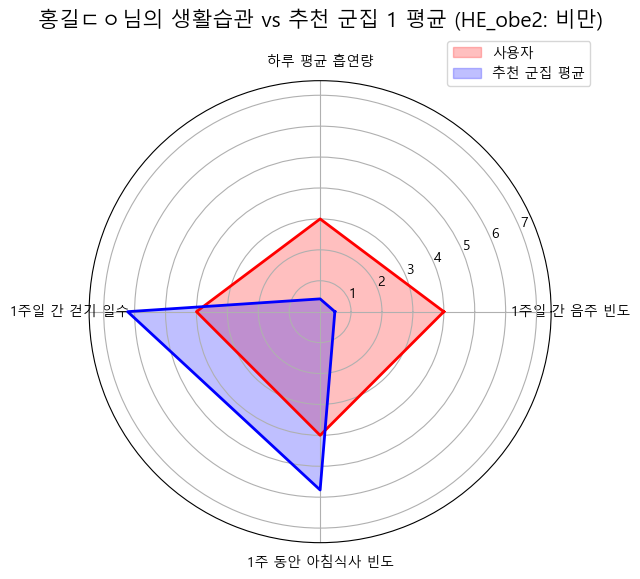

이 수치에 도달하려면 음주와 흡연을 줄이고, 걷기와 아침식사 빈도를 늘리면 과체중로 개선될 가능성이 있습니다! (저체중은 피해주세요)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from math import pi

# matplotlib 한국어 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 및 전처리
df = pd.read_csv("건강데이터_2022_2023_합본.csv")
df = df[(df['HE_glu'] >= 50) & (df['HE_glu'] <= 400)]

# 전처리: 1주일간 걷기 일수
df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({
    '1.0': 0, '2.0': 1, '3.0': 2, '4.0': 3, '5.0': 4, '6.0': 5, '7.0': 6, '8.0': 7,
    '88.0': 0, '99.0': np.nan, 'nan': np.nan
})
df['BE3_31'] = pd.to_numeric(df['BE3_31'], errors='coerce')

# 전처리: L_BR_FQ (최근 1년 동안 1주 동안 아침식사 빈도)
df['L_BR_FQ'] = df['L_BR_FQ'].astype(str).str.strip().replace({
    '1.0': 6, '2.0': 3.5, '3.0': 1.5, '4.0': 0, '9.0': np.nan, 'nan': np.nan
})
df['L_BR_FQ'] = pd.to_numeric(df['L_BR_FQ'], errors='coerce')

# 전처리: tobacco (일반 담배 + 전자 담배 하루 평균 흡연량)
df['BS3_2'] = df['BS3_2'].replace(888, 0)
df['BS12_47_1'] = df['BS12_47_1'].replace({888: 0, 999: np.nan})
df['BS3_2'] = pd.to_numeric(df['BS3_2'], errors='coerce')
df['BS12_47_1'] = pd.to_numeric(df['BS12_47_1'], errors='coerce')
df['tobacco'] = df[['BS3_2', 'BS12_47_1']].sum(axis=1, skipna=True)
df['tobacco'] = df['tobacco'].astype(str).str.strip().replace({'999.0': np.nan})
df['tobacco'] = pd.to_numeric(df['tobacco'], errors='coerce')

# 전처리: BD1_11 (1년간 음주빈도)
df['BD1_11'] = df['BD1_11'].astype(str).str.strip().replace({
    '1.0': 0, '2.0': 6, '3.0': 12, '4.0': 42, '5.0': 130, '6.0': 286,
    '8.0': 0, '9.0': np.nan, 'nan': np.nan
})
df['BD1_11'] = pd.to_numeric(df['BD1_11'], errors='coerce')

# 고혈압 파생변수 생성 (HE_HP2)
def determine_he_hp2(sbp, dbp):
    if pd.isna(sbp) or pd.isna(dbp):
        return np.nan
    if sbp >= 140 or dbp >= 90:
        return 4
    elif 130 <= sbp <= 139 or 80 <= dbp <= 89:
        return 3
    elif 120 <= sbp <= 129 and dbp < 80:
        return 2
    else:
        return 1

# 당뇨 파생변수 생성 (HE_DM_HbA1c2)
def determine_he_dm_hba1c2(glu):
    if pd.isna(glu):
        return np.nan
    if glu < 100:
        return 1
    elif 100 <= glu <= 125:
        return 2
    else:
        return 3

# 비만 파생변수 생성 (HE_obe2)
def determine_he_obe2(bmi):
    if bmi <= 18.5:
        return 1
    elif 18.5 < bmi <= 22.9:
        return 2
    elif 22.9 < bmi <= 24.9:
        return 3
    elif 24.9 < bmi <= 29.9:
        return 4
    elif 29.9 < bmi <= 34.9:
        return 5
    else:
        return 6

# 파생변수 적용
df['HE_HP2'] = df.apply(lambda row: determine_he_hp2(row['HE_sbp1'], row['HE_dbp1']), axis=1)
df['HE_DM_HbA1c2'] = df.apply(lambda row: determine_he_dm_hba1c2(row['HE_glu']), axis=1)
df['HE_obe2'] = df.apply(lambda row: determine_he_obe2(row['HE_BMI']), axis=1)
df['HE_HP2'] = pd.to_numeric(df['HE_HP2'], errors='coerce')
df['HE_DM_HbA1c2'] = pd.to_numeric(df['HE_DM_HbA1c2'], errors='coerce')
df['HE_obe2'] = pd.to_numeric(df['HE_obe2'], errors='coerce')

# 결측치 처리 및 데이터 준비
df_clustering = df.dropna(subset=['HE_HP2', 'HE_DM_HbA1c2', 'HE_obe2'])
selected_cols = ['BD1_11', 'tobacco', 'BE3_31', 'L_BR_FQ']

# 선택된 컬럼의 결측치를 최빈값으로 대체
for col in selected_cols:
    if df_clustering[col].isnull().any():
        mode_value = df_clustering[col].mode(dropna=True)
        if not mode_value.empty:
            df_clustering[col].fillna(mode_value[0], inplace=True)
        else:
            df_clustering[col].fillna(0, inplace=True)

# 사전 계산된 군집 평균 데이터
precalculated_means = {
    # 고혈압 (HE_HP2)
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [0.212965, 0.346154, 0.263829, 0.283081, 3.773973, 0.532374, 3.081522],
        '하루 평균 흡연량': [0.180919, 0.803408, 0.243425, 0.696676, 18.815068, 18.654676, 1.434783],
        '1주일 간 걷기 일수': [1.006360, 5.964613, 6.167879, 1.013850, 3.102740, 3.805755, 4.766304],
        '1주 동안 아침식사 빈도': [5.547703, 0.613368, 5.585898, 0.623269, 2.616438, 3.769784, 3.337862]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [3.257282, 0.600634, 0.173377, 0.227414, 0.761134, 5.500000, 1.003752],
        '하루 평균 흡연량': [0.582524, 0.444444, 0.102253, 0.382550, 23.385965, 6.716981, 13.719512],
        '1주일 간 걷기 일수': [5.291262, 3.584229, 6.287695, 1.201342, 1.666667, 2.660377, 6.024390],
        '1주 동안 아침식사 빈도': [5.432039, 0.605735, 5.757366, 5.692394, 3.789474, 3.924528, 3.152439]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.517830, 0.747283, 2.083208, 0.473159, 5.500000, 1.960664],
        '하루 평균 흡연량': [0.255906, 1.091078, 19.352941, 0.420361, 2.595745, 17.242424],
        '1주일 간 걷기 일수': [6.213583, 3.780669, 1.895425, 1.308703, 4.085106, 5.469697],
        '1주 동안 아침식사 빈도': [5.778543, 0.697026, 2.271242, 5.749589, 4.049645, 5.295455]
    }, index=[0, 1, 2, 3, 4, 5]),
    4: pd.DataFrame({
        '1주일 간 음주 빈도': [5.500000, 0.463656, 0.471816, 2.740812, 0.930769],
        '하루 평균 흡연량': [2.284672, 0.332907, 0.317814, 20.272222, 1.310000],
        '1주일 간 걷기 일수': [3.729927, 6.289373, 1.212551, 3.850000, 3.813333],
        '1주 동안 아침식사 빈도': [4.463504, 5.839949, 5.731781, 3.738889, 0.693333]
    }, index=[0, 1, 2, 3, 4]),
    # 당뇨 (HE_DM_HbA1c2)
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [3.462264, 0.056121, 0.347728, 0.147807, 1.490074, 0.463646],
        '하루 평균 흡연량': [3.226415, 0.073930, 0.485380, 0.297521, 19.774194, 0.698630],
        '1주일 간 걷기 일수': [3.094340, 0.443580, 6.187135, 0.719008, 3.967742, 5.945205],
        '1주 동안 아침식사 빈도': [2.943396, 5.659533, 5.576023, 0.619835, 3.064516, 0.534247]
    }, index=[0, 1, 2, 3, 4, 5]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [1.346814, 0.619275, 0.418860, 5.237327, 0.692170, 0.278670],
        '하루 평균 흡연량': [18.386266, 0.748092, 0.245912, 7.737327, 0.670251, 0.306064],
        '1주일 간 걷기 일수': [3.497854, 1.219466, 6.217444, 3.718894, 6.069892, 1.216554],
        '1주 동안 아침식사 빈도': [3.343348, 0.885496, 5.662326, 4.158986, 0.585125, 5.677575]
    }, index=[0, 1, 2, 3, 4, 5]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.428221, 0.465444, 1.405400, 0.733680, 5.500000],
        '하루 평균 흡연량': [0.353503, 0.406190, 19.929293, 0.981982, 5.000000],
        '1주일 간 걷기 일수': [1.168790, 6.233075, 3.691919, 3.645045, 4.143836],
        '1주 동안 아침식사 빈도': [5.685510, 5.787234, 3.845960, 0.740541, 4.191781]
    }, index=[0, 1, 2, 3, 4]),
    # 비만 (HE_obe2)
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [3.462264, 0.056121, 0.347728, 0.147807, 1.490074, 0.463646],
        '하루 평균 흡연량': [3.226415, 0.073930, 0.485380, 0.297521, 19.774194, 0.698630],
        '1주일 간 걷기 일수': [3.094340, 0.443580, 6.187135, 0.719008, 3.967742, 5.945205],
        '1주 동안 아침식사 빈도': [2.943396, 5.659533, 5.576023, 0.619835, 3.064516, 0.534247]
    }, index=[0, 1, 2, 3, 4, 5]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [1.346814, 0.619275, 0.418860, 5.237327, 0.692170, 0.278670],
        '하루 평균 흡연량': [18.386266, 0.748092, 0.245912, 7.737327, 0.670251, 0.306064],
        '1주일 간 걷기 일수': [3.497854, 1.219466, 6.217444, 3.718894, 6.069892, 1.216554],
        '1주 동안 아침식사 빈도': [3.343348, 0.885496, 5.662326, 4.158986, 0.585125, 5.677575]
    }, index=[0, 1, 2, 3, 4, 5]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.428221, 0.465444, 1.405400, 0.733680, 5.500000],
        '하루 평균 흡연량': [0.353503, 0.406190, 19.929293, 0.981982, 5.000000],
        '1주일 간 걷기 일수': [1.168790, 6.233075, 3.691919, 3.645045, 4.143836],
        '1주 동안 아침식사 빈도': [5.685510, 5.787234, 3.845960, 0.740541, 4.191781]
    }, index=[0, 1, 2, 3, 4]),
    4: pd.DataFrame({
        '1주일 간 음주 빈도': [1.745897, 0.476494, 0.474684, 4.074257, 0.400403],
        '하루 평균 흡연량': [20.120000, 0.413905, 0.444304, 2.267327, 0.994178],
        '1주일 간 걷기 일수': [3.673333, 6.226354, 1.289873, 4.603960, 3.608443],
        '1주 동안 아침식사 빈도': [3.465000, 5.767583, 5.724684, 2.785479, 0.788937]
    }, index=[0, 1, 2, 3, 4]),
    5: pd.DataFrame({
        '1주일 간 음주 빈도': [0.313474, 0.188658, 1.018219, 4.313953, 0.697115, 2.906780, 0.266827],
        '하루 평균 흡연량': [0.215686, 0.218978, 17.921053, 3.069767, 23.687500, 2.000000, 1.331250],
        '1주일 간 걷기 일수': [6.202614, 1.160584, 3.368421, 2.488372, 3.781250, 4.915254, 3.893750],
        '1주 동안 아침식사 빈도': [5.722222, 5.635036, 5.605263, 5.174419, 0.984375, 0.838983, 0.659375]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    6: pd.DataFrame({
        '1주일 간 음주 빈도': [0.202830, 5.500000, 0.407692, 0.332308, 1.230769],
        '하루 평균 흡연량': [0.198113, 7.692308, 0.642857, 0.400000, 20.360000],
        '1주일 간 걷기 일수': [0.424528, 5.230769, 3.942857, 6.480000, 3.840000],
        '1주 동안 아침식사 빈도': [5.787736, 4.730769, 0.600000, 5.625000, 3.480000]
    }, index=[0, 1, 2, 3, 4])
}

# 사용자 입력 함수
def get_user_input():
    print("사용자의 생활습관 수치를 입력해주세요.")
    name = input("사용자 이름: ")
    sbp = float(input("수축기 혈압 (mmHg): "))
    dbp = float(input("이완기 혈압 (mmHg): "))
    glu = float(input("공복혈당 (mg/dL): "))
    bmi = float(input("BMI: "))
    weekly_alcohol = float(input("1주일 간 음주 빈도 (회): "))
    daily_smoking = float(input("하루 평균 흡연량 (개비): "))
    weekly_exercise = float(input("1주일 간 걷기 일수 (회): "))
    daily_veg = float(input("1주 동안 아침식사 빈도 (회): "))
    return name, sbp, dbp, glu, bmi, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg

# 군집 결정 함수 (사전 계산된 평균 사용 및 더 나은 군집 추천)
def determine_cluster_with_better_recommendation(user_data_weekly_daily, current_value, scaler, precalculated_means_dict, selected_cols, condition_type):
    dm_value_int = int(current_value)

    if dm_value_int not in precalculated_means_dict:
        print(f"사전 계산된 군집 평균 데이터에 {condition_type}={dm_value_int} 그룹이 없습니다.")
        return None, None, None

    cluster_means_precalculated_text_names = precalculated_means_dict[dm_value_int].copy()

    text_to_internal_col_mapping = {
        '1주일 간 음주 빈도': 'BD1_11',
        '하루 평균 흡연량': 'tobacco',
        '1주일 간 걷기 일수': 'BE3_31',
        '1주 동안 아침식사 빈도': 'L_BR_FQ'
    }

    cluster_means_precalculated_internal_names = pd.DataFrame(index=cluster_means_precalculated_text_names.index)
    for internal_col in selected_cols:
        text_col = next((k for k, v in text_to_internal_col_mapping.items() if v == internal_col), None)
        if text_col and text_col in cluster_means_precalculated_text_names.columns:
            cluster_means_precalculated_internal_names[internal_col] = cluster_means_precalculated_text_names[text_col]
        else:
            print(f"경고: 내부 컬럼 '{internal_col}'에 대한 텍스트 이름 매핑이 없거나 사전 계산된 데이터에 없습니다.")
            cluster_means_precalculated_internal_names[internal_col] = np.nan

    if cluster_means_precalculated_internal_names.isnull().values.any():
        print("경고: 스케일링하려는 사전 계산된 평균 데이터에 결측치가 포함되어 있습니다.")
        return None, None, None

    scaled_precalculated_centroids = scaler.transform(cluster_means_precalculated_internal_names[selected_cols])

    user_data_transformed_for_predict = [
        user_data_weekly_daily[0] * 52,  # 주간 음주 -> 연간 음주
        user_data_weekly_daily[1],       # 하루 흡연
        user_data_weekly_daily[2],       # 주간 걷기
        user_data_weekly_daily[3]        # 아침식사
    ]

    user_data_scaled_for_predict = scaler.transform([user_data_transformed_for_predict])

    distances = np.linalg.norm(scaled_precalculated_centroids - user_data_scaled_for_predict, axis=1)
    current_cluster = np.argmin(distances)
    current_cluster_means = precalculated_means_dict[dm_value_int].iloc[current_cluster]

    # 더 나은 군집 찾기 (질병 단계가 낮고, 생활습관이 개선된 군집)
    better_clusters = []
    for cluster_idx in precalculated_means_dict[dm_value_int].index:
        cluster_means = precalculated_means_dict[dm_value_int].iloc[cluster_idx]
        # 생활습관 개선 기준: 음주, 흡연 감소, 걷기/아침식사 빈도 증가
        is_better = (cluster_means['1주일 간 음주 빈도'] <= current_cluster_means['1주일 간 음주 빈도'] and
                     cluster_means['하루 평균 흡연량'] <= current_cluster_means['하루 평균 흡연량'] and
                     cluster_means['1주일 간 걷기 일수'] >= current_cluster_means['1주일 간 걷기 일수'] and
                     cluster_means['1주 동안 아침식사 빈도'] >= current_cluster_means['1주 동안 아침식사 빈도'])
        if is_better and cluster_idx != current_cluster:
            distance = distances[cluster_idx]
            better_clusters.append((cluster_idx, distance))

    if better_clusters:
        better_cluster = min(better_clusters, key=lambda x: x[1])[0]  # 가장 유사한 더 나은 군집
        better_cluster_means = precalculated_means_dict[dm_value_int].iloc[better_cluster]
    else:
        # 더 나은 군집이 없으면 현재 군집의 다음 낮은 단계(정상 방향) 군집 추천
        target_stage = max(1, dm_value_int - 1)
        if target_stage in precalculated_means_dict:
            better_cluster_means = precalculated_means_dict[target_stage].iloc[0]  # 첫 번째 군집 선택
            better_cluster = 0
        else:
            better_cluster_means = None
            better_cluster = None

    return current_cluster, current_cluster_means, (better_cluster, better_cluster_means)

# 레이더 차트 생성 함수
def plot_radar_chart(user_data_weekly_daily, cluster_mean_weekly_daily, categories, title):
    values_user = user_data_weekly_daily[:]
    values_cluster = cluster_mean_weekly_daily[:]
    all_values = values_user + values_cluster
    max_val = max(all_values) if all_values else 1

    values_user = values_user + values_user[:1]
    values_cluster = values_cluster + values_cluster[:1]
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_ylim(0, max_val * 1.2)
    ax.fill(angles, values_user, color='red', alpha=0.25, label='사용자')
    ax.plot(angles, values_user, color='red', linewidth=2)
    ax.fill(angles, values_cluster, color='blue', alpha=0.25, label='추천 군집 평균')
    ax.plot(angles, values_cluster, color='blue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(title, size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    ax.grid(True)
    plt.show()

# 메인 서비스 함수
def health_comparison_service():
    name, sbp, dbp, glu, bmi, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg = get_user_input()

    # 고혈압 분류
    he_hp2 = determine_he_hp2(sbp, dbp)
    he_hp2_labels = {1: "정상", 2: "주의", 3: "고혈압 전단계", 4: "고혈압"}
    if pd.isna(he_hp2):
        print(f"\n혈압 수치 ({sbp}/{dbp})가 유효하지 않아 HE_HP2 분류를 할 수 없습니다.")
    else:
        he_hp2_int = int(he_hp2)
        if he_hp2_int not in precalculated_means:
            print(f"\nHE_HP2 그룹 {he_hp2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        else:
            print(f"\n{name}님은 수축기 혈압 {sbp}, 이완기 혈압 {dbp}를 고려했을 때 HE_HP2 = {he_hp2_int}, {he_hp2_labels[he_hp2_int]}에 속합니다.")
            hp_df = df_clustering[df_clustering['HE_HP2'] == he_hp2_int][selected_cols].copy()
            if hp_df.empty:
                print(f"\nHE_HP2 그룹 {he_hp2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            else:
                scaler = StandardScaler()
                scaler.fit(hp_df[selected_cols])
                user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                current_cluster, current_cluster_means, (better_cluster, better_cluster_means) = determine_cluster_with_better_recommendation(
                    user_data_for_cluster_input, he_hp2_int, scaler, precalculated_means, selected_cols, "HE_HP2"
                )
                if current_cluster is not None:
                    print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 {he_hp2_labels[he_hp2_int]} 그룹의 {current_cluster}번 군집에 속합니다.")
                    print("\n✅ 사용자 생활습관 vs 추천 군집 평균 비교 (고혈압):")
                    user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                    if better_cluster is not None and better_cluster_means is not None:
                        better_comp_values = better_cluster_means.tolist()
                        item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '1주 동안 아침식사 빈도']
                        table_data = {
                            '항목': item_names,
                            f'{name}님 수치': user_values,
                            f'추천 군집 {better_cluster} 평균 수치': better_comp_values
                        }
                        comparison_df = pd.DataFrame(table_data)
                        print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
                        plot_radar_chart(user_values, better_comp_values, item_names,
                                      f"{name}님의 생활습관 vs 추천 군집 {better_cluster} 평균 (HE_HP2: {he_hp2_labels[he_hp2_int]})")
                        print(f"이 수치에 도달하려면 음주와 흡연을 줄이고, 걷기와 아침식사 빈도를 늘리면 {he_hp2_labels[max(1, he_hp2_int - 1)]}로 개선될 가능성이 있습니다!")
                    else:
                        print("더 나은 군집을 찾을 수 없었습니다. 현재 상태를 유지하며 상담을 추천드립니다.")

    # 당뇨 분류
    he_dm_hba1c2 = determine_he_dm_hba1c2(glu)
    he_dm_hba1c2_labels = {1: "정상", 2: "당뇨 전단계", 3: "당뇨"}
    if pd.isna(he_dm_hba1c2):
        print(f"\n공복혈당 수치 ({glu})가 유효하지 않아 HE_DM_HbA1c2 분류를 할 수 없습니다.")
    else:
        he_dm_hba1c2_int = int(he_dm_hba1c2)
        if he_dm_hba1c2_int not in precalculated_means:
            print(f"\nHE_DM_HbA1c2 그룹 {he_dm_hba1c2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        else:
            print(f"\n{name}님은 공복혈당 {glu}를 고려했을 때 HE_DM_HbA1c2 = {he_dm_hba1c2_int}, {he_dm_hba1c2_labels[he_dm_hba1c2_int]}에 속합니다.")
            dm_df = df_clustering[df_clustering['HE_DM_HbA1c2'] == he_dm_hba1c2_int][selected_cols].copy()
            if dm_df.empty:
                print(f"\nHE_DM_HbA1c2 그룹 {he_dm_hba1c2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            else:
                scaler = StandardScaler()
                scaler.fit(dm_df[selected_cols])
                user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                current_cluster, current_cluster_means, (better_cluster, better_cluster_means) = determine_cluster_with_better_recommendation(
                    user_data_for_cluster_input, he_dm_hba1c2_int, scaler, precalculated_means, selected_cols, "HE_DM_HbA1c2"
                )
                if current_cluster is not None:
                    print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 {he_dm_hba1c2_labels[he_dm_hba1c2_int]} 그룹의 {current_cluster}번 군집에 속합니다.")
                    print("\n✅ 사용자 생활습관 vs 추천 군집 평균 비교 (당뇨):")
                    user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                    if better_cluster is not None and better_cluster_means is not None:
                        better_comp_values = better_cluster_means.tolist()
                        item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '1주 동안 아침식사 빈도']
                        table_data = {
                            '항목': item_names,
                            f'{name}님 수치': user_values,
                            f'추천 군집 {better_cluster} 평균 수치': better_comp_values
                        }
                        comparison_df = pd.DataFrame(table_data)
                        print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
                        plot_radar_chart(user_values, better_comp_values, item_names,
                                      f"{name}님의 생활습관 vs 추천 군집 {better_cluster} 평균 (HE_DM_HbA1c2: {he_dm_hba1c2_labels[he_dm_hba1c2_int]})")
                        print(f"이 수치에 도달하려면 음주와 흡연을 줄이고, 걷기와 아침식사 빈도를 늘리면 {he_dm_hba1c2_labels[max(1, he_dm_hba1c2_int - 1)]}로 개선될 가능성이 있습니다!")
                    else:
                        print("더 나은 군집을 찾을 수 없었습니다. 현재 상태를 유지하며 상담을 추천드립니다.")

    # 비만 분류
    he_obe2 = determine_he_obe2(bmi)
    he_obe2_labels = {1: "저체중", 2: "정상", 3: "과체중", 4: "비만", 5: "고도 비만", 6: "초고도 비만"}
    if pd.isna(he_obe2):
        print(f"\nBMI 수치 ({bmi})가 유효하지 않아 HE_obe2 분류를 할 수 없습니다.")
    else:
        he_obe2_int = int(he_obe2)
        if he_obe2_int not in precalculated_means:
            print(f"\nHE_obe2 그룹 {he_obe2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        else:
            print(f"\n{name}님은 BMI {bmi}를 고려했을 때 HE_obe2 = {he_obe2_int}, {he_obe2_labels[he_obe2_int]}에 속합니다.")
            obe_df = df_clustering[df_clustering['HE_obe2'] == he_obe2_int][selected_cols].copy()
            if obe_df.empty:
                print(f"\nHE_obe2 그룹 {he_obe2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            else:
                scaler = StandardScaler()
                scaler.fit(obe_df[selected_cols])
                user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                current_cluster, current_cluster_means, (better_cluster, better_cluster_means) = determine_cluster_with_better_recommendation(
                    user_data_for_cluster_input, he_obe2_int, scaler, precalculated_means, selected_cols, "HE_obe2"
                )
                if current_cluster is not None:
                    print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 {he_obe2_labels[he_obe2_int]} 그룹의 {current_cluster}번 군집에 속합니다.")
                    print("\n✅ 사용자 생활습관 vs 추천 군집 평균 비교 (비만):")
                    user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                    if better_cluster is not None and better_cluster_means is not None:
                        better_comp_values = better_cluster_means.tolist()
                        item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '1주 동안 아침식사 빈도']
                        table_data = {
                            '항목': item_names,
                            f'{name}님 수치': user_values,
                            f'추천 군집 {better_cluster} 평균 수치': better_comp_values
                        }
                        comparison_df = pd.DataFrame(table_data)
                        print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
                        plot_radar_chart(user_values, better_comp_values, item_names,
                                      f"{name}님의 생활습관 vs 추천 군집 {better_cluster} 평균 (HE_obe2: {he_obe2_labels[he_obe2_int]})")
                        print(f"이 수치에 도달하려면 음주와 흡연을 줄이고, 걷기와 아침식사 빈도를 늘리면 {he_obe2_labels[max(2, he_obe2_int - 1)]}로 개선될 가능성이 있습니다! (저체중은 피해주세요)")
                    else:
                        print("더 나은 군집을 찾을 수 없었습니다. 현재 상태를 유지하며 상담을 추천드립니다.")

# 서비스 실행
if __name__ == "__main__":
    health_comparison_service()

C:\Users\82104\AppData\Local\Temp\ipykernel_40992\1852498277.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({
C:\Users\82104\AppData\Local\Temp\ipykernel_40992\1852498277.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['L_BR_FQ'] = df['L_BR_FQ'].astype(str).str.strip().replace({
C:\Users\82104\AppData\Local\Temp\ipykernel_40992\1852498277.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

사용자의 생활습관 수치를 입력해주세요.

gg님은 수축기 혈압 140.0, 이완기 혈압 90.0를 고려했을 때 HE_HP2 = 4, 고혈압에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 고혈압 그룹의 1번 군집에 속합니다.

✅ 사용자 생활습관 vs 조금 더 나은 군집 평균 비교 (고혈압):
| 항목                   |   gg님 수치 |   조금 더 나은 군집 평균 수치 |
|:-----------------------|------------:|------------------------------:|
| 1주일 간 음주 빈도     |        4.00 |                          0.48 |
| 하루 평균 흡연량       |        4.00 |                          0.41 |
| 1주일 간 걷기 일수     |        5.00 |                          6.23 |
| 1주 동안 아침식사 빈도 |        5.00 |                          5.77 |


c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


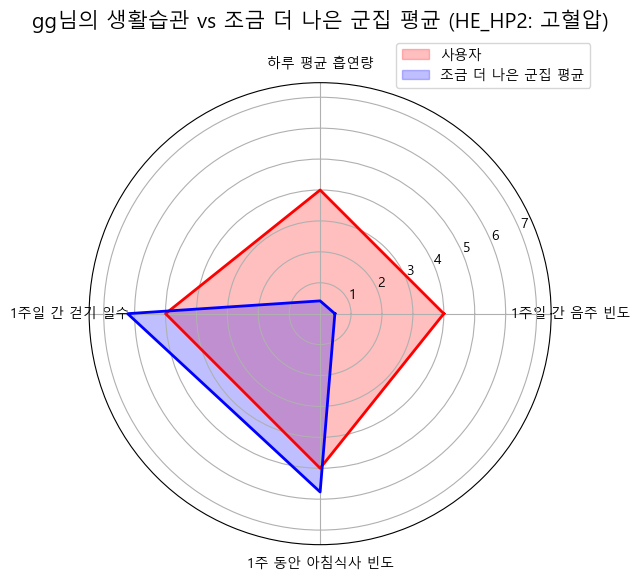

이 작은 변화로 조금 더 나은 건강 상태를 유지할 수 있습니다! 음주와 흡연을 줄이고, 걷기와 아침식사를 조금 더 늘려보세요.

gg님은 공복혈당 88.0를 고려했을 때 HE_DM_HbA1c2 = 1, 정상에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 정상 그룹의 2번 군집에 속합니다.

✅ 사용자 생활습관 vs 조금 더 나은 군집 평균 비교 (당뇨):
| 항목                   |   gg님 수치 |   조금 더 나은 군집 평균 수치 |
|:-----------------------|------------:|------------------------------:|
| 1주일 간 음주 빈도     |        4.00 |                          0.35 |
| 하루 평균 흡연량       |        4.00 |                          0.49 |
| 1주일 간 걷기 일수     |        5.00 |                          6.19 |
| 1주 동안 아침식사 빈도 |        5.00 |                          5.58 |


c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


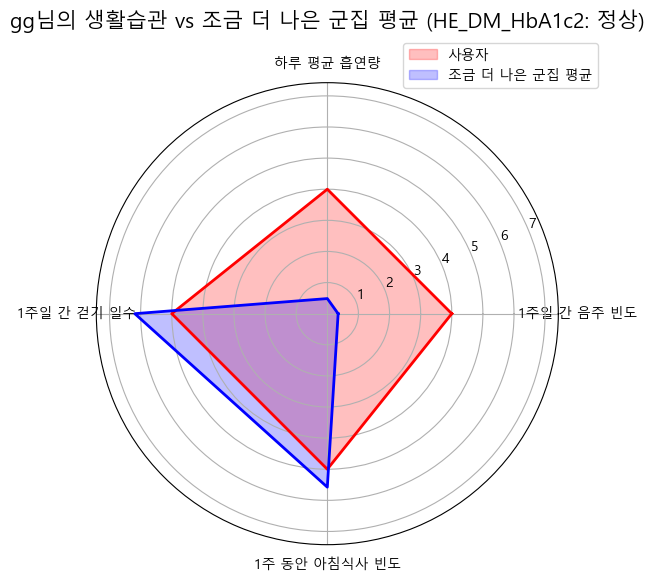

이 작은 변화로 조금 더 나은 건강 상태를 유지할 수 있습니다! 음주와 흡연을 줄이고, 걷기와 아침식을 조금 더 늘려보세요.

gg님은 BMI 29.0를 고려했을 때 HE_obe2 = 4, 비만에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 비만 그룹의 1번 군집에 속합니다.

✅ 사용자 생활습관 vs 조금 더 나은 군집 평균 비교 (비만):
| 항목                   |   gg님 수치 |   조금 더 나은 군집 평균 수치 |
|:-----------------------|------------:|------------------------------:|
| 1주일 간 음주 빈도     |        4.00 |                          0.48 |
| 하루 평균 흡연량       |        4.00 |                          0.41 |
| 1주일 간 걷기 일수     |        5.00 |                          6.23 |
| 1주 동안 아침식사 빈도 |        5.00 |                          5.77 |


c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


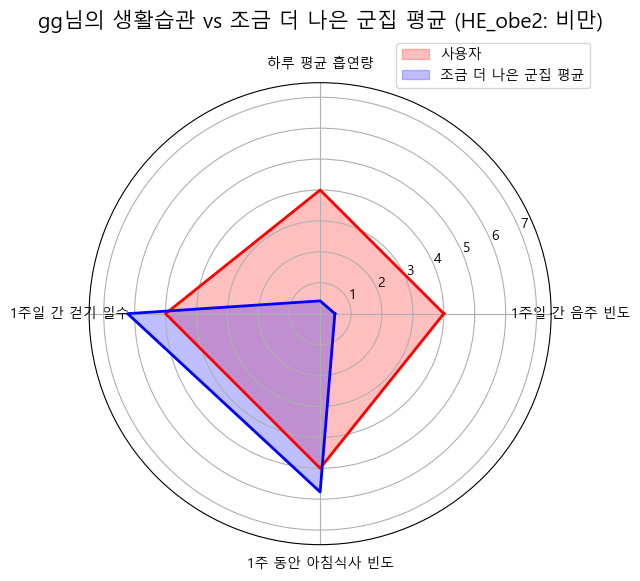

이 작은 변화로 조금 더 나은 건강 상태를 유지할 수 있습니다! 음주와 흡연을 줄이고, 걷기와 아침식을 조금 더 늘려보세요. (저체중은 피해주세요)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from math import pi

# matplotlib 한국어 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 및 전처리
df = pd.read_csv("건강데이터_2022_2023_합본.csv")
df = df[(df['HE_glu'] >= 50) & (df['HE_glu'] <= 400)]

# 전처리: 1주일간 걷기 일수
df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({
    '1.0': 0, '2.0': 1, '3.0': 2, '4.0': 3, '5.0': 4, '6.0': 5, '7.0': 6, '8.0': 7,
    '88.0': 0, '99.0': np.nan, 'nan': np.nan
})
df['BE3_31'] = pd.to_numeric(df['BE3_31'], errors='coerce')

# 전처리: L_BR_FQ (최근 1년 동안 1주 동안 아침식사 빈도)
df['L_BR_FQ'] = df['L_BR_FQ'].astype(str).str.strip().replace({
    '1.0': 6, '2.0': 3.5, '3.0': 1.5, '4.0': 0, '9.0': np.nan, 'nan': np.nan
})
df['L_BR_FQ'] = pd.to_numeric(df['L_BR_FQ'], errors='coerce')

# 전처리: tobacco (일반 담배 + 전자 담배 하루 평균 흡연량)
df['BS3_2'] = df['BS3_2'].replace(888, 0)
df['BS12_47_1'] = df['BS12_47_1'].replace({888: 0, 999: np.nan})
df['BS3_2'] = pd.to_numeric(df['BS3_2'], errors='coerce')
df['BS12_47_1'] = pd.to_numeric(df['BS12_47_1'], errors='coerce')
df['tobacco'] = df[['BS3_2', 'BS12_47_1']].sum(axis=1, skipna=True)
df['tobacco'] = df['tobacco'].astype(str).str.strip().replace({'999.0': np.nan})
df['tobacco'] = pd.to_numeric(df['tobacco'], errors='coerce')

# 전처리: BD1_11 (1년간 음주빈도)
df['BD1_11'] = df['BD1_11'].astype(str).str.strip().replace({
    '1.0': 0, '2.0': 6, '3.0': 12, '4.0': 42, '5.0': 130, '6.0': 286,
    '8.0': 0, '9.0': np.nan, 'nan': np.nan
})
df['BD1_11'] = pd.to_numeric(df['BD1_11'], errors='coerce')

# 고혈압 파생변수 생성 (HE_HP2)
def determine_he_hp2(sbp, dbp):
    if pd.isna(sbp) or pd.isna(dbp):
        return np.nan
    if sbp >= 140 or dbp >= 90:
        return 4
    elif 130 <= sbp <= 139 or 80 <= dbp <= 89:
        return 3
    elif 120 <= sbp <= 129 and dbp < 80:
        return 2
    else:
        return 1

# 당뇨 파생변수 생성 (HE_DM_HbA1c2)
def determine_he_dm_hba1c2(glu):
    if pd.isna(glu):
        return np.nan
    if glu < 100:
        return 1
    elif 100 <= glu <= 125:
        return 2
    else:
        return 3

# 비만 파생변수 생성 (HE_obe2)
def determine_he_obe2(bmi):
    if bmi <= 18.5:
        return 1
    elif 18.5 < bmi <= 22.9:
        return 2
    elif 22.9 < bmi <= 24.9:
        return 3
    elif 24.9 < bmi <= 29.9:
        return 4
    elif 29.9 < bmi <= 34.9:
        return 5
    else:
        return 6

# 파생변수 적용
df['HE_HP2'] = df.apply(lambda row: determine_he_hp2(row['HE_sbp1'], row['HE_dbp1']), axis=1)
df['HE_DM_HbA1c2'] = df.apply(lambda row: determine_he_dm_hba1c2(row['HE_glu']), axis=1)
df['HE_obe2'] = df.apply(lambda row: determine_he_obe2(row['HE_BMI']), axis=1)
df['HE_HP2'] = pd.to_numeric(df['HE_HP2'], errors='coerce')
df['HE_DM_HbA1c2'] = pd.to_numeric(df['HE_DM_HbA1c2'], errors='coerce')
df['HE_obe2'] = pd.to_numeric(df['HE_obe2'], errors='coerce')

# 결측치 처리 및 데이터 준비
df_clustering = df.dropna(subset=['HE_HP2', 'HE_DM_HbA1c2', 'HE_obe2'])
lifestyle_cols = ['BD1_11', 'tobacco', 'BE3_31', 'L_BR_FQ']

# 선택된 컬럼의 결측치를 최빈값으로 대체
for col in lifestyle_cols:
    if df_clustering[col].isnull().any():
        mode_value = df_clustering[col].mode(dropna=True)
        if not mode_value.empty:
            df_clustering[col].fillna(mode_value[0], inplace=True)
        else:
            df_clustering[col].fillna(0, inplace=True)

# 사전 계산된 군집 평균 데이터
precalculated_means = {
    # 고혈압 (HE_HP2)
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [0.212965, 0.346154, 0.263829, 0.283081, 3.773973, 0.532374, 3.081522],
        '하루 평균 흡연량': [0.180919, 0.803408, 0.243425, 0.696676, 18.815068, 18.654676, 1.434783],
        '1주일 간 걷기 일수': [1.006360, 5.964613, 6.167879, 1.013850, 3.102740, 3.805755, 4.766304],
        '1주 동안 아침식사 빈도': [5.547703, 0.613368, 5.585898, 0.623269, 2.616438, 3.769784, 3.337862]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [3.257282, 0.600634, 0.173377, 0.227414, 0.761134, 5.500000, 1.003752],
        '하루 평균 흡연량': [0.582524, 0.444444, 0.102253, 0.382550, 23.385965, 6.716981, 13.719512],
        '1주일 간 걷기 일수': [5.291262, 3.584229, 6.287695, 1.201342, 1.666667, 2.660377, 6.024390],
        '1주 동안 아침식사 빈도': [5.432039, 0.605735, 5.757366, 5.692394, 3.789474, 3.924528, 3.152439]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.517830, 0.747283, 2.083208, 0.473159, 5.500000, 1.960664],
        '하루 평균 흡연량': [0.255906, 1.091078, 19.352941, 0.420361, 2.595745, 17.242424],
        '1주일 간 걷기 일수': [6.213583, 3.780669, 1.895425, 1.308703, 4.085106, 5.469697],
        '1주 동안 아침식사 빈도': [5.778543, 0.697026, 2.271242, 5.749589, 4.049645, 5.295455]
    }, index=[0, 1, 2, 3, 4, 5]),
    4: pd.DataFrame({
        '1주일 간 음주 빈도': [5.500000, 0.463656, 0.471816, 2.740812, 0.930769],
        '하루 평균 흡연량': [2.284672, 0.332907, 0.317814, 20.272222, 1.310000],
        '1주일 간 걷기 일수': [3.729927, 6.289373, 1.212551, 3.850000, 3.813333],
        '1주 동안 아침식사 빈도': [4.463504, 5.839949, 5.731781, 3.738889, 0.693333]
    }, index=[0, 1, 2, 3, 4]),
    
    # 당뇨 (HE_DM_HbA1c2)
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [3.462264, 0.056121, 0.347728, 0.147807, 1.490074, 0.463646],
        '하루 평균 흡연량': [3.226415, 0.073930, 0.485380, 0.297521, 19.774194, 0.698630],
        '1주일 간 걷기 일수': [3.094340, 0.443580, 6.187135, 0.719008, 3.967742, 5.945205],
        '1주 동안 아침식사 빈도': [2.943396, 5.659533, 5.576023, 0.619835, 3.064516, 0.534247]
    }, index=[0, 1, 2, 3, 4, 5]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [1.346814, 0.619275, 0.418860, 5.237327, 0.692170, 0.278670],
        '하루 평균 흡연량': [18.386266, 0.748092, 0.245912, 7.737327, 0.670251, 0.306064],
        '1주일 간 걷기 일수': [3.497854, 1.219466, 6.217444, 3.718894, 6.069892, 1.216554],
        '1주 동안 아침식사 빈도': [3.343348, 0.885496, 5.662326, 4.158986, 0.585125, 5.677575]
    }, index=[0, 1, 2, 3, 4, 5]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.428221, 0.465444, 1.405400, 0.733680, 5.500000],
        '하루 평균 흡연량': [0.353503, 0.406190, 19.929293, 0.981982, 5.000000],
        '1주일 간 걷기 일수': [1.168790, 6.233075, 3.691919, 3.645045, 4.143836],
        '1주 동안 아침식사 빈도': [5.685510, 5.787234, 3.845960, 0.740541, 4.191781]
    }, index=[0, 1, 2, 3, 4]),
    # 비만 (HE_obe2)
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [3.462264, 0.056121, 0.347728, 0.147807, 1.490074, 0.463646],
        '하루 평균 흡연량': [3.226415, 0.073930, 0.485380, 0.297521, 19.774194, 0.698630],
        '1주일 간 걷기 일수': [3.094340, 0.443580, 6.187135, 0.719008, 3.967742, 5.945205],
        '1주 동안 아침식사 빈도': [2.943396, 5.659533, 5.576023, 0.619835, 3.064516, 0.534247]
    }, index=[0, 1, 2, 3, 4, 5]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [1.346814, 0.619275, 0.418860, 5.237327, 0.692170, 0.278670],
        '하루 평균 흡연량': [18.386266, 0.748092, 0.245912, 7.737327, 0.670251, 0.306064],
        '1주일 간 걷기 일수': [3.497854, 1.219466, 6.217444, 3.718894, 6.069892, 1.216554],
        '1주 동안 아침식사 빈도': [3.343348, 0.885496, 5.662326, 4.158986, 0.585125, 5.677575]
    }, index=[0, 1, 2, 3, 4, 5]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.428221, 0.465444, 1.405400, 0.733680, 5.500000],
        '하루 평균 흡연량': [0.353503, 0.406190, 19.929293, 0.981982, 5.000000],
        '1주일 간 걷기 일수': [1.168790, 6.233075, 3.691919, 3.645045, 4.143836],
        '1주 동안 아침식사 빈도': [5.685510, 5.787234, 3.845960, 0.740541, 4.191781]
    }, index=[0, 1, 2, 3, 4]),
    4: pd.DataFrame({
        '1주일 간 음주 빈도': [1.745897, 0.476494, 0.474684, 4.074257, 0.400403],
        '하루 평균 흡연량': [20.120000, 0.413905, 0.444304, 2.267327, 0.994178],
        '1주일 간 걷기 일수': [3.673333, 6.226354, 1.289873, 4.603960, 3.608443],
        '1주 동안 아침식사 빈도': [3.465000, 5.767583, 5.724684, 2.785479, 0.788937]
    }, index=[0, 1, 2, 3, 4]),
    5: pd.DataFrame({
        '1주일 간 음주 빈도': [0.313474, 0.188658, 1.018219, 4.313953, 0.697115, 2.906780, 0.266827],
        '하루 평균 흡연량': [0.215686, 0.218978, 17.921053, 3.069767, 23.687500, 2.000000, 1.331250],
        '1주일 간 걷기 일수': [6.202614, 1.160584, 3.368421, 2.488372, 3.781250, 4.915254, 3.893750],
        '1주 동안 아침식사 빈도': [5.722222, 5.635036, 5.605263, 5.174419, 0.984375, 0.838983, 0.659375]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    6: pd.DataFrame({
        '1주일 간 음주 빈도': [0.202830, 5.500000, 0.407692, 0.332308, 1.230769],
        '하루 평균 흡연량': [0.198113, 7.692308, 0.642857, 0.400000, 20.360000],
        '1주일 간 걷기 일수': [0.424528, 5.230769, 3.942857, 6.480000, 3.840000],
        '1주 동안 아침식사 빈도': [5.787736, 4.730769, 0.600000, 5.625000, 3.480000]
    }, index=[0, 1, 2, 3, 4])
}

# 사용자 입력 함수
def get_user_input():
    print("사용자의 생활습관 수치를 입력해주세요.")
    name = input("사용자 이름: ")
    sbp = float(input("수축기 혈압 (mmHg): "))
    dbp = float(input("이완기 혈압 (mmHg): "))
    glu = float(input("공복혈당 (mg/dL): "))
    bmi = float(input("BMI: "))
    weekly_alcohol = float(input("1주일 간 음주 빈도 (회): "))
    daily_smoking = float(input("하루 평균 흡연량 (개비): "))
    weekly_exercise = float(input("1주일 간 걷기 일수 (회): "))
    daily_veg = float(input("1주 동안 아침식사 빈도 (회): "))
    return name, sbp, dbp, glu, bmi, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg


# 가중치 계산 및 추천 군집 찾기 함수
def determine_cluster_with_recommendation(user_data_weekly_daily, current_value, scaler, precalculated_means_dict, lifestyle_cols, condition_type):
    dm_value_int = int(current_value)

    if dm_value_int not in precalculated_means_dict:
        print(f"사전 계산된 군집 평균 데이터에 {condition_type}={dm_value_int} 그룹이 없습니다.")
        return None, None, None

    cluster_data = precalculated_means_dict[dm_value_int].copy()
    text_to_internal_col_mapping = {
        '1주일 간 음주 빈도': 'BD1_11',
        '하루 평균 흡연량': 'tobacco',
        '1주일 간 걷기 일수': 'BE3_31',
        '1주 동안 아침식사 빈도': 'L_BR_FQ'
    }
    internal_to_text_col_mapping = {v: k for k, v in text_to_internal_col_mapping.items()}

    # 한국어 열 이름으로 변환된 lifestyle_cols
    lifestyle_cols_text = [internal_to_text_col_mapping[col] for col in lifestyle_cols]

    # 군집 데이터 준비
    cluster_data_internal_names = pd.DataFrame(index=cluster_data.index)
    for internal_col in lifestyle_cols:
        text_col = internal_to_text_col_mapping.get(internal_col)
        if text_col and text_col in cluster_data.columns:
            cluster_data_internal_names[internal_col] = cluster_data[text_col]
        else:
            print(f"경고: 내부 컬럼 '{internal_col}'에 대한 텍스트 이름 매핑이 없거나 사전 계산된 데이터에 없습니다.")
            cluster_data_internal_names[internal_col] = np.nan

    if cluster_data_internal_names.isnull().values.any():
        print("경고: 스케일링하려는 사전 계산된 평균 데이터에 결측치가 포함되어 있습니다.")
        return None, None, None

    scaled_precalculated_centroids = scaler.transform(cluster_data_internal_names[lifestyle_cols])

    # 사용자 데이터 변환 및 스케일링
    user_data_transformed_for_predict = [
        user_data_weekly_daily[0] * 52,  # 주간 음주 -> 연간 음주
        user_data_weekly_daily[1],       # 하루 흡연
        user_data_weekly_daily[2],       # 주간 걷기
        user_data_weekly_daily[3]        # 아침식사
    ]
    user_data_scaled_for_predict = scaler.transform([user_data_transformed_for_predict])

    # 현재 군집 결정 (유클리드 거리 기반)
    distances = np.linalg.norm(scaled_precalculated_centroids - user_data_scaled_for_predict, axis=1)
    current_cluster_id = np.argmin(distances)
    current_cluster_data = cluster_data.iloc[current_cluster_id]

    # 1. 랜덤포레스트 기반 가중치 계산 (임의로 설정)
    # 실제로는 RandomForestRegressor를 사용하여 중요도를 계산해야 하지만, 요청에 따라 임의로 설정
    feature_weights = {
        'BD1_11': 0.3,  # 음주 빈도 (낮을수록 건강에 좋음)
        'tobacco': 0.3,  # 흡연량 (낮을수록 건강에 좋음)
        'BE3_31': 0.2,  # 걷기 일수 (높을수록 건강에 좋음)
        'L_BR_FQ': 0.2  # 아침식사 빈도 (높을수록 건강에 좋음)
    }

    # 2. 건강 점수 계산
    # 음주와 흡연은 낮을수록 점수가 높게, 걷기와 아침식사는 높을수록 점수가 높게
    cluster_health_scores = []
    for idx in cluster_data.index:
        cluster_vals = cluster_data.loc[idx, lifestyle_cols_text]
        # 건강 점수 계산: 음주는 음수 가중치, 걷기와 아침식사는 양수 가중치
        health_score = (
            -feature_weights['BD1_11'] * cluster_vals['1주일 간 음주 빈도'] +
            -feature_weights['tobacco'] * cluster_vals['하루 평균 흡연량'] +
            feature_weights['BE3_31'] * cluster_vals['1주일 간 걷기 일수'] +
            feature_weights['L_BR_FQ'] * cluster_vals['1주 동안 아침식사 빈도']
        )
        cluster_health_scores.append(health_score)

    cluster_data['Health_Score'] = cluster_health_scores

    # 3. 건강 점수가 높은 군집 선택 (상위 50% 기준)
    health_score_threshold = cluster_data['Health_Score'].quantile(0.5)
    healthier_clusters = cluster_data[cluster_data['Health_Score'] >= health_score_threshold]

    if healthier_clusters.empty:
        return current_cluster_id, current_cluster_data, None

    # 4. 코사인 유사도를 사용하여 추천 군집 찾기
    user_vec = np.array([
        user_data_weekly_daily[0],  # 주간 음주 빈도
        user_data_weekly_daily[1],  # 하루 평균 흡연량
        user_data_weekly_daily[2],  # 주간 걷기 일수
        user_data_weekly_daily[3]   # 아침식사 빈도
    ])
    healthier_vectors = healthier_clusters[lifestyle_cols_text].values
    similarities = cosine_similarity([user_vec], healthier_vectors)[0]
    best_idx = similarities.argmax()
    recommended_cluster_id = healthier_clusters.index[best_idx]
    recommended_cluster_data = cluster_data.loc[recommended_cluster_id]

    return current_cluster_id, current_cluster_data, recommended_cluster_data


# 레이더 차트 생성 함수
def plot_radar_chart(user_data_weekly_daily, cluster_mean_weekly_daily, categories, title):
    values_user = user_data_weekly_daily[:]
    values_cluster = cluster_mean_weekly_daily[:]
    all_values = values_user + values_cluster
    max_val = max(all_values) if all_values else 1

    values_user = values_user + values_user[:1]
    values_cluster = values_cluster + values_cluster[:1]
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_ylim(0, max_val * 1.2)
    ax.fill(angles, values_user, color='red', alpha=0.25, label='사용자')
    ax.plot(angles, values_user, color='red', linewidth=2)
    ax.fill(angles, values_cluster, color='blue', alpha=0.25, label='조금 더 나은 군집 평균')
    ax.plot(angles, values_cluster, color='blue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(title, size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    ax.grid(True)
    plt.show()

# 메인 서비스 함수
def health_comparison_service():
    name, sbp, dbp, glu, bmi, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg = get_user_input()

    # 매핑 정의 (health_comparison_service 내에서 사용하기 위해 추가)
    text_to_internal_col_mapping = {
        '1주일 간 음주 빈도': 'BD1_11',
        '하루 평균 흡연량': 'tobacco',
        '1주일 간 걷기 일수': 'BE3_31',
        '1주 동안 아침식사 빈도': 'L_BR_FQ'
    }
    internal_to_text_col_mapping = {v: k for k, v in text_to_internal_col_mapping.items()}
    lifestyle_cols_text = [internal_to_text_col_mapping[col] for col in lifestyle_cols]

    # 고혈압 분류
    he_hp2 = determine_he_hp2(sbp, dbp)
    he_hp2_labels = {1: "정상", 2: "주의", 3: "고혈압 전단계", 4: "고혈압"}
    if pd.isna(he_hp2):
        print(f"\n혈압 수치 ({sbp}/{dbp})가 유효하지 않아 HE_HP2 분류를 할 수 없습니다.")
    else:
        he_hp2_int = int(he_hp2)
        if he_hp2_int not in precalculated_means:
            print(f"\nHE_HP2 그룹 {he_hp2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        else:
            print(f"\n{name}님은 수축기 혈압 {sbp}, 이완기 혈압 {dbp}를 고려했을 때 HE_HP2 = {he_hp2_int}, {he_hp2_labels[he_hp2_int]}에 속합니다.")
            hp_df = df_clustering[df_clustering['HE_HP2'] == he_hp2_int][lifestyle_cols].copy()
            if hp_df.empty:
                print(f"\nHE_HP2 그룹 {he_hp2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            else:
                scaler = StandardScaler()
                scaler.fit(hp_df[lifestyle_cols])
                user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                current_cluster_id, current_cluster_data, recommended_cluster_data = determine_cluster_with_recommendation(
                    user_data_for_cluster_input, he_hp2_int, scaler, precalculated_means, lifestyle_cols, "HE_HP2"
                )
                if current_cluster_id is not None:
                    print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 {he_hp2_labels[he_hp2_int]} 그룹의 {current_cluster_id}번 군집에 속합니다.")
                    print("\n✅ 사용자 생활습관 vs 조금 더 나은 군집 평균 비교 (고혈압):")
                    user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                    if recommended_cluster_data is not None:
                        recommended_values = recommended_cluster_data[lifestyle_cols_text].tolist()  # 한국어 열 이름 사용
                        item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '1주 동안 아침식사 빈도']
                        table_data = {
                            '항목': item_names,
                            f'{name}님 수치': user_values,
                            '조금 더 나은 군집 평균 수치': recommended_values
                        }
                        comparison_df = pd.DataFrame(table_data)
                        print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
                        plot_radar_chart(user_values, recommended_values, item_names,
                                      f"{name}님의 생활습관 vs 조금 더 나은 군집 평균 (HE_HP2: {he_hp2_labels[he_hp2_int]})")
                        print("이 작은 변화로 조금 더 나은 건강 상태를 유지할 수 있습니다! 음주와 흡연을 줄이고, 걷기와 아침식사를 조금 더 늘려보세요.")
                    else:
                        print("조금 더 나은 군집을 찾을 수 없었습니다. 현재 생활습관을 유지하며 전문가와 상담을 고려하세요.")

    # 당뇨 분류
    he_dm_hba1c2 = determine_he_dm_hba1c2(glu)
    he_dm_hba1c2_labels = {1: "정상", 2: "당뇨 전단계", 3: "당뇨"}
    if pd.isna(he_dm_hba1c2):
        print(f"\n공복혈당 수치 ({glu})가 유효하지 않아 HE_DM_HbA1c2 분류를 할 수 없습니다.")
    else:
        he_dm_hba1c2_int = int(he_dm_hba1c2)
        if he_dm_hba1c2_int not in precalculated_means:
            print(f"\nHE_DM_HbA1c2 그룹 {he_dm_hba1c2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        else:
            print(f"\n{name}님은 공복혈당 {glu}를 고려했을 때 HE_DM_HbA1c2 = {he_dm_hba1c2_int}, {he_dm_hba1c2_labels[he_dm_hba1c2_int]}에 속합니다.")
            dm_df = df_clustering[df_clustering['HE_DM_HbA1c2'] == he_dm_hba1c2_int][lifestyle_cols].copy()
            if dm_df.empty:
                print(f"\nHE_DM_HbA1c2 그룹 {he_dm_hba1c2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            else:
                scaler = StandardScaler()
                scaler.fit(dm_df[lifestyle_cols])
                user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                current_cluster_id, current_cluster_data, recommended_cluster_data = determine_cluster_with_recommendation(
                    user_data_for_cluster_input, he_dm_hba1c2_int, scaler, precalculated_means, lifestyle_cols, "HE_DM_HbA1c2"
                )
                if current_cluster_id is not None:
                    print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 {he_dm_hba1c2_labels[he_dm_hba1c2_int]} 그룹의 {current_cluster_id}번 군집에 속합니다.")
                    print("\n✅ 사용자 생활습관 vs 조금 더 나은 군집 평균 비교 (당뇨):")
                    user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                    if recommended_cluster_data is not None:
                        recommended_values = recommended_cluster_data[lifestyle_cols_text].tolist()  # 한국어 열 이름 사용
                        item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '1주 동안 아침식사 빈도']
                        table_data = {
                            '항목': item_names,
                            f'{name}님 수치': user_values,
                            '조금 더 나은 군집 평균 수치': recommended_values
                        }
                        comparison_df = pd.DataFrame(table_data)
                        print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
                        plot_radar_chart(user_values, recommended_values, item_names,
                                      f"{name}님의 생활습관 vs 조금 더 나은 군집 평균 (HE_DM_HbA1c2: {he_dm_hba1c2_labels[he_dm_hba1c2_int]})")
                        print("이 작은 변화로 조금 더 나은 건강 상태를 유지할 수 있습니다! 음주와 흡연을 줄이고, 걷기와 아침식을 조금 더 늘려보세요.")
                    else:
                        print("조금 더 나은 군집을 찾을 수 없었습니다. 현재 생활습관을 유지하며 전문가와 상담을 고려하세요.")

    # 비만 분류
    he_obe2 = determine_he_obe2(bmi)
    he_obe2_labels = {1: "저체중", 2: "정상", 3: "과체중", 4: "비만", 5: "고도 비만", 6: "초고도 비만"}
    if pd.isna(he_obe2):
        print(f"\nBMI 수치 ({bmi})가 유효하지 않아 HE_obe2 분류를 할 수 없습니다.")
    else:
        he_obe2_int = int(he_obe2)
        if he_obe2_int not in precalculated_means:
            print(f"\nHE_obe2 그룹 {he_obe2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        else:
            print(f"\n{name}님은 BMI {bmi}를 고려했을 때 HE_obe2 = {he_obe2_int}, {he_obe2_labels[he_obe2_int]}에 속합니다.")
            obe_df = df_clustering[df_clustering['HE_obe2'] == he_obe2_int][lifestyle_cols].copy()
            if obe_df.empty:
                print(f"\nHE_obe2 그룹 {he_obe2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            else:
                scaler = StandardScaler()
                scaler.fit(obe_df[lifestyle_cols])
                user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                current_cluster_id, current_cluster_data, recommended_cluster_data = determine_cluster_with_recommendation(
                    user_data_for_cluster_input, he_obe2_int, scaler, precalculated_means, lifestyle_cols, "HE_obe2"
                )
                if current_cluster_id is not None:
                    print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 {he_obe2_labels[he_obe2_int]} 그룹의 {current_cluster_id}번 군집에 속합니다.")
                    print("\n✅ 사용자 생활습관 vs 조금 더 나은 군집 평균 비교 (비만):")
                    user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                    if recommended_cluster_data is not None:
                        recommended_values = recommended_cluster_data[lifestyle_cols_text].tolist()  # 한국어 열 이름 사용
                        item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '1주 동안 아침식사 빈도']
                        table_data = {
                            '항목': item_names,
                            f'{name}님 수치': user_values,
                            '조금 더 나은 군집 평균 수치': recommended_values
                        }
                        comparison_df = pd.DataFrame(table_data)
                        print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
                        plot_radar_chart(user_values, recommended_values, item_names,
                                      f"{name}님의 생활습관 vs 조금 더 나은 군집 평균 (HE_obe2: {he_obe2_labels[he_obe2_int]})")
                        print("이 작은 변화로 조금 더 나은 건강 상태를 유지할 수 있습니다! 음주와 흡연을 줄이고, 걷기와 아침식을 조금 더 늘려보세요. (저체중은 피해주세요)")
                    else:
                        print("조금 더 나은 군집을 찾을 수 없었습니다. 현재 생활습관을 유지하며 전문가와 상담을 고려하세요.")

# 서비스 실행
if __name__ == "__main__":
    health_comparison_service()

C:\Users\82104\AppData\Local\Temp\ipykernel_40992\2658356312.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({
C:\Users\82104\AppData\Local\Temp\ipykernel_40992\2658356312.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['L_BR_FQ'] = df['L_BR_FQ'].astype(str).str.strip().replace({
C:\Users\82104\AppData\Local\Temp\ipykernel_40992\2658356312.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

사용자의 생활습관 수치를 입력해주세요.

gg님은 수축기 혈압 140.0, 이완기 혈압 90.0를 고려했을 때 HE_HP2 = 4, 고혈압에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 고혈압 그룹의 3번 군집에 속합니다.

✅ 사용자 생활습관 vs 조금 더 나은 군집 평균 비교 (고혈압):
| 항목                   |   gg님 수치 |   조금 더 나은 군집 평균 수치 |
|:-----------------------|------------:|------------------------------:|
| 1주일 간 음주 빈도     |        5.00 |                          0.40 |
| 하루 평균 흡연량       |        5.00 |                          0.99 |
| 1주일 간 걷기 일수     |        4.00 |                          3.61 |
| 1주 동안 아침식사 빈도 |        4.00 |                          0.79 |


c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


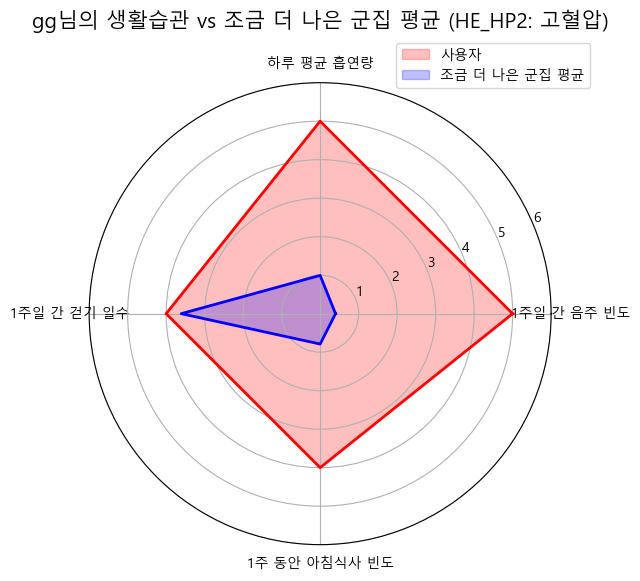

c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


이 작은 변화로 조금 더 나은 건강 상태를 유지할 수 있습니다! 음주와 흡연을 줄이고, 걷기와 아침식사를 조금 더 늘려보세요.

gg님은 공복혈당 88.0를 고려했을 때 HE_DM_HbA1c2 = 1, 정상에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 정상 그룹의 0번 군집에 속합니다.

✅ 사용자 생활습관 vs 조금 더 나은 군집 평균 비교 (당뇨):
| 항목                   |   gg님 수치 |   조금 더 나은 군집 평균 수치 |
|:-----------------------|------------:|------------------------------:|
| 1주일 간 음주 빈도     |        5.00 |                          0.15 |
| 하루 평균 흡연량       |        5.00 |                          0.30 |
| 1주일 간 걷기 일수     |        4.00 |                          0.72 |
| 1주 동안 아침식사 빈도 |        4.00 |                          0.62 |


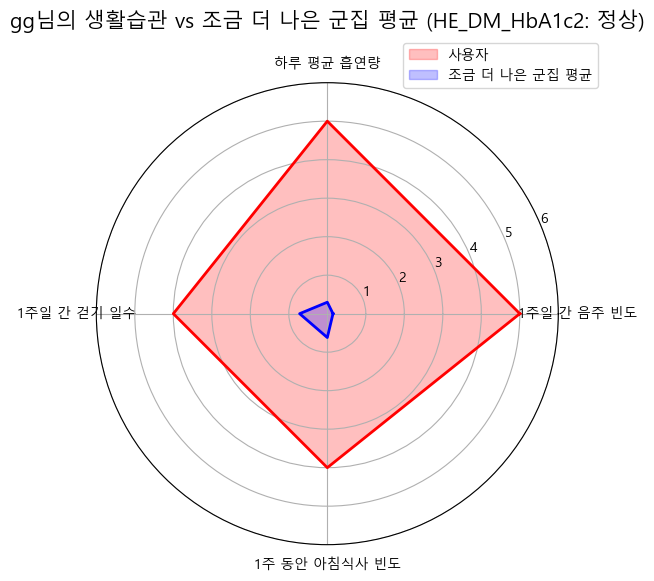

이 작은 변화로 조금 더 나은 건강 상태를 유지할 수 있습니다! 음주와 흡연을 줄이고, 걷기와 아침식을 조금 더 늘려보세요.

gg님은 BMI 28.0를 고려했을 때 HE_obe2 = 4, 비만에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 비만 그룹의 3번 군집에 속합니다.

✅ 사용자 생활습관 vs 조금 더 나은 군집 평균 비교 (비만):
| 항목                   |   gg님 수치 |   조금 더 나은 군집 평균 수치 |
|:-----------------------|------------:|------------------------------:|
| 1주일 간 음주 빈도     |        5.00 |                          0.40 |
| 하루 평균 흡연량       |        5.00 |                          0.99 |
| 1주일 간 걷기 일수     |        4.00 |                          3.61 |
| 1주 동안 아침식사 빈도 |        4.00 |                          0.79 |


c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


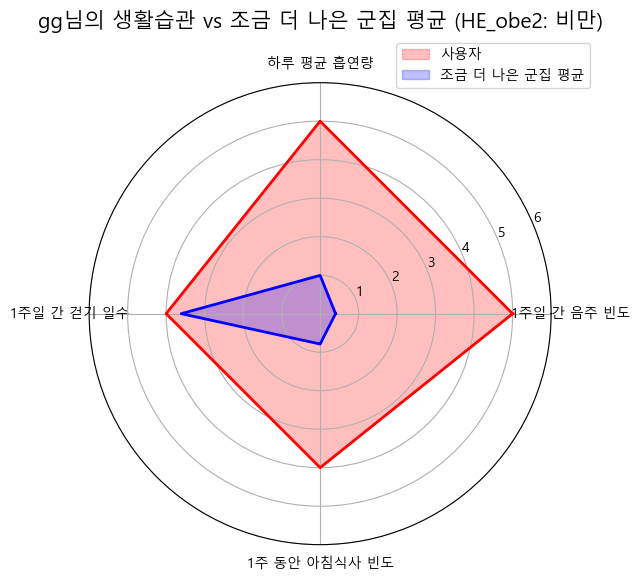

이 작은 변화로 조금 더 나은 건강 상태를 유지할 수 있습니다! 음주와 흡연을 줄이고, 걷기와 아침식을 조금 더 늘려보세요. (저체중은 피해주세요)


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from math import pi

# matplotlib 한국어 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 및 전처리
df = pd.read_csv("건강데이터_2022_2023_합본.csv")
df = df[(df['HE_glu'] >= 50) & (df['HE_glu'] <= 400)]

# 전처리: 1주일간 걷기 일수
df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({
    '1.0': 0, '2.0': 1, '3.0': 2, '4.0': 3, '5.0': 4, '6.0': 5, '7.0': 6, '8.0': 7,
    '88.0': 0, '99.0': np.nan, 'nan': np.nan
})
df['BE3_31'] = pd.to_numeric(df['BE3_31'], errors='coerce')

# 전처리: L_BR_FQ (최근 1년 동안 1주 동안 아침식사 빈도)
df['L_BR_FQ'] = df['L_BR_FQ'].astype(str).str.strip().replace({
    '1.0': 6, '2.0': 3.5, '3.0': 1.5, '4.0': 0, '9.0': np.nan, 'nan': np.nan
})
df['L_BR_FQ'] = pd.to_numeric(df['L_BR_FQ'], errors='coerce')

# 전처리: tobacco (일반 담배 + 전자 담배 하루 평균 흡연량)
df['BS3_2'] = df['BS3_2'].replace(888, 0)
df['BS12_47_1'] = df['BS12_47_1'].replace({888: 0, 999: np.nan})
df['BS3_2'] = pd.to_numeric(df['BS3_2'], errors='coerce')
df['BS12_47_1'] = pd.to_numeric(df['BS12_47_1'], errors='coerce')
df['tobacco'] = df[['BS3_2', 'BS12_47_1']].sum(axis=1, skipna=True)
df['tobacco'] = df['tobacco'].astype(str).str.strip().replace({'999.0': np.nan})
df['tobacco'] = pd.to_numeric(df['tobacco'], errors='coerce')

# 전처리: BD1_11 (1년간 음주빈도)
df['BD1_11'] = df['BD1_11'].astype(str).str.strip().replace({
    '1.0': 0, '2.0': 6, '3.0': 12, '4.0': 42, '5.0': 130, '6.0': 286,
    '8.0': 0, '9.0': np.nan, 'nan': np.nan
})
df['BD1_11'] = pd.to_numeric(df['BD1_11'], errors='coerce')

# 고혈압 파생변수 생성 (HE_HP2)
def determine_he_hp2(sbp, dbp):
    if pd.isna(sbp) or pd.isna(dbp):
        return np.nan
    if sbp >= 140 or dbp >= 90:
        return 4
    elif 130 <= sbp <= 139 or 80 <= dbp <= 89:
        return 3
    elif 120 <= sbp <= 129 and dbp < 80:
        return 2
    else:
        return 1

# 당뇨 파생변수 생성 (HE_DM_HbA1c2)
def determine_he_dm_hba1c2(glu):
    if pd.isna(glu):
        return np.nan
    if glu < 100:
        return 1
    elif 100 <= glu <= 125:
        return 2
    else:
        return 3

# 비만 파생변수 생성 (HE_obe2)
def determine_he_obe2(bmi):
    if bmi <= 18.5:
        return 1
    elif 18.5 < bmi <= 22.9:
        return 2
    elif 22.9 < bmi <= 24.9:
        return 3
    elif 24.9 < bmi <= 29.9:
        return 4
    elif 29.9 < bmi <= 34.9:
        return 5
    else:
        return 6

# 파생변수 적용
df['HE_HP2'] = df.apply(lambda row: determine_he_hp2(row['HE_sbp1'], row['HE_dbp1']), axis=1)
df['HE_DM_HbA1c2'] = df.apply(lambda row: determine_he_dm_hba1c2(row['HE_glu']), axis=1)
df['HE_obe2'] = df.apply(lambda row: determine_he_obe2(row['HE_BMI']), axis=1)
df['HE_HP2'] = pd.to_numeric(df['HE_HP2'], errors='coerce')
df['HE_DM_HbA1c2'] = pd.to_numeric(df['HE_DM_HbA1c2'], errors='coerce')
df['HE_obe2'] = pd.to_numeric(df['HE_obe2'], errors='coerce')

# 결측치 처리 및 데이터 준비
df_clustering = df.dropna(subset=['HE_HP2', 'HE_DM_HbA1c2', 'HE_obe2'])
lifestyle_cols = ['BD1_11', 'tobacco', 'BE3_31', 'L_BR_FQ']

# 선택된 컬럼의 결측치를 최빈값으로 대체
for col in lifestyle_cols:
    if df_clustering[col].isnull().any():
        mode_value = df_clustering[col].mode(dropna=True)
        if not mode_value.empty:
            df_clustering[col].fillna(mode_value[0], inplace=True)
        else:
            df_clustering[col].fillna(0, inplace=True)

# 사전 계산된 군집 평균 데이터 (이전 코드 생략, 동일하게 유지)
# 사전 계산된 군집 평균 데이터
precalculated_means = {
    # 고혈압 (HE_HP2)
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [0.212965, 0.346154, 0.263829, 0.283081, 3.773973, 0.532374, 3.081522],
        '하루 평균 흡연량': [0.180919, 0.803408, 0.243425, 0.696676, 18.815068, 18.654676, 1.434783],
        '1주일 간 걷기 일수': [1.006360, 5.964613, 6.167879, 1.013850, 3.102740, 3.805755, 4.766304],
        '1주 동안 아침식사 빈도': [5.547703, 0.613368, 5.585898, 0.623269, 2.616438, 3.769784, 3.337862]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [3.257282, 0.600634, 0.173377, 0.227414, 0.761134, 5.500000, 1.003752],
        '하루 평균 흡연량': [0.582524, 0.444444, 0.102253, 0.382550, 23.385965, 6.716981, 13.719512],
        '1주일 간 걷기 일수': [5.291262, 3.584229, 6.287695, 1.201342, 1.666667, 2.660377, 6.024390],
        '1주 동안 아침식사 빈도': [5.432039, 0.605735, 5.757366, 5.692394, 3.789474, 3.924528, 3.152439]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.517830, 0.747283, 2.083208, 0.473159, 5.500000, 1.960664],
        '하루 평균 흡연량': [0.255906, 1.091078, 19.352941, 0.420361, 2.595745, 17.242424],
        '1주일 간 걷기 일수': [6.213583, 3.780669, 1.895425, 1.308703, 4.085106, 5.469697],
        '1주 동안 아침식사 빈도': [5.778543, 0.697026, 2.271242, 5.749589, 4.049645, 5.295455]
    }, index=[0, 1, 2, 3, 4, 5]),
    4: pd.DataFrame({
        '1주일 간 음주 빈도': [5.500000, 0.463656, 0.471816, 2.740812, 0.930769],
        '하루 평균 흡연량': [2.284672, 0.332907, 0.317814, 20.272222, 1.310000],
        '1주일 간 걷기 일수': [3.729927, 6.289373, 1.212551, 3.850000, 3.813333],
        '1주 동안 아침식사 빈도': [4.463504, 5.839949, 5.731781, 3.738889, 0.693333]
    }, index=[0, 1, 2, 3, 4]),
    
    # 당뇨 (HE_DM_HbA1c2)
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [3.462264, 0.056121, 0.347728, 0.147807, 1.490074, 0.463646],
        '하루 평균 흡연량': [3.226415, 0.073930, 0.485380, 0.297521, 19.774194, 0.698630],
        '1주일 간 걷기 일수': [3.094340, 0.443580, 6.187135, 0.719008, 3.967742, 5.945205],
        '1주 동안 아침식사 빈도': [2.943396, 5.659533, 5.576023, 0.619835, 3.064516, 0.534247]
    }, index=[0, 1, 2, 3, 4, 5]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [1.346814, 0.619275, 0.418860, 5.237327, 0.692170, 0.278670],
        '하루 평균 흡연량': [18.386266, 0.748092, 0.245912, 7.737327, 0.670251, 0.306064],
        '1주일 간 걷기 일수': [3.497854, 1.219466, 6.217444, 3.718894, 6.069892, 1.216554],
        '1주 동안 아침식사 빈도': [3.343348, 0.885496, 5.662326, 4.158986, 0.585125, 5.677575]
    }, index=[0, 1, 2, 3, 4, 5]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.428221, 0.465444, 1.405400, 0.733680, 5.500000],
        '하루 평균 흡연량': [0.353503, 0.406190, 19.929293, 0.981982, 5.000000],
        '1주일 간 걷기 일수': [1.168790, 6.233075, 3.691919, 3.645045, 4.143836],
        '1주 동안 아침식사 빈도': [5.685510, 5.787234, 3.845960, 0.740541, 4.191781]
    }, index=[0, 1, 2, 3, 4]),
    # 비만 (HE_obe2)
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [3.462264, 0.056121, 0.347728, 0.147807, 1.490074, 0.463646],
        '하루 평균 흡연량': [3.226415, 0.073930, 0.485380, 0.297521, 19.774194, 0.698630],
        '1주일 간 걷기 일수': [3.094340, 0.443580, 6.187135, 0.719008, 3.967742, 5.945205],
        '1주 동안 아침식사 빈도': [2.943396, 5.659533, 5.576023, 0.619835, 3.064516, 0.534247]
    }, index=[0, 1, 2, 3, 4, 5]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [1.346814, 0.619275, 0.418860, 5.237327, 0.692170, 0.278670],
        '하루 평균 흡연량': [18.386266, 0.748092, 0.245912, 7.737327, 0.670251, 0.306064],
        '1주일 간 걷기 일수': [3.497854, 1.219466, 6.217444, 3.718894, 6.069892, 1.216554],
        '1주 동안 아침식사 빈도': [3.343348, 0.885496, 5.662326, 4.158986, 0.585125, 5.677575]
    }, index=[0, 1, 2, 3, 4, 5]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.428221, 0.465444, 1.405400, 0.733680, 5.500000],
        '하루 평균 흡연량': [0.353503, 0.406190, 19.929293, 0.981982, 5.000000],
        '1주일 간 걷기 일수': [1.168790, 6.233075, 3.691919, 3.645045, 4.143836],
        '1주 동안 아침식사 빈도': [5.685510, 5.787234, 3.845960, 0.740541, 4.191781]
    }, index=[0, 1, 2, 3, 4]),
    4: pd.DataFrame({
        '1주일 간 음주 빈도': [1.745897, 0.476494, 0.474684, 4.074257, 0.400403],
        '하루 평균 흡연량': [20.120000, 0.413905, 0.444304, 2.267327, 0.994178],
        '1주일 간 걷기 일수': [3.673333, 6.226354, 1.289873, 4.603960, 3.608443],
        '1주 동안 아침식사 빈도': [3.465000, 5.767583, 5.724684, 2.785479, 0.788937]
    }, index=[0, 1, 2, 3, 4]),
    5: pd.DataFrame({
        '1주일 간 음주 빈도': [0.313474, 0.188658, 1.018219, 4.313953, 0.697115, 2.906780, 0.266827],
        '하루 평균 흡연량': [0.215686, 0.218978, 17.921053, 3.069767, 23.687500, 2.000000, 1.331250],
        '1주일 간 걷기 일수': [6.202614, 1.160584, 3.368421, 2.488372, 3.781250, 4.915254, 3.893750],
        '1주 동안 아침식사 빈도': [5.722222, 5.635036, 5.605263, 5.174419, 0.984375, 0.838983, 0.659375]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    6: pd.DataFrame({
        '1주일 간 음주 빈도': [0.202830, 5.500000, 0.407692, 0.332308, 1.230769],
        '하루 평균 흡연량': [0.198113, 7.692308, 0.642857, 0.400000, 20.360000],
        '1주일 간 걷기 일수': [0.424528, 5.230769, 3.942857, 6.480000, 3.840000],
        '1주 동안 아침식사 빈도': [5.787736, 4.730769, 0.600000, 5.625000, 3.480000]
    }, index=[0, 1, 2, 3, 4])
}

# 사용자 입력 함수 (이전 코드 생략, 동일하게 유지)
def get_user_input():
    print("사용자의 생활습관 수치를 입력해주세요.")
    name = input("사용자 이름: ")
    sbp = float(input("수축기 혈압 (mmHg): "))
    dbp = float(input("이완기 혈압 (mmHg): "))
    glu = float(input("공복혈당 (mg/dL): "))
    bmi = float(input("BMI: "))
    weekly_alcohol = float(input("1주일 간 음주 빈도 (회): "))
    daily_smoking = float(input("하루 평균 흡연량 (개비): "))
    weekly_exercise = float(input("1주일 간 걷기 일수 (회): "))
    daily_veg = float(input("1주 동안 아침식사 빈도 (회): "))
    return name, sbp, dbp, glu, bmi, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg

# 가중치 계산 및 추천 군집 찾기 함수 (이전 코드 유지)
def determine_cluster_with_recommendation(user_data_weekly_daily, current_value, scaler, precalculated_means_dict, lifestyle_cols, condition_type):
    dm_value_int = int(current_value)

    if dm_value_int not in precalculated_means_dict:
        print(f"사전 계산된 군집 평균 데이터에 {condition_type}={dm_value_int} 그룹이 없습니다.")
        return None, None, None

    cluster_data = precalculated_means_dict[dm_value_int].copy()
    text_to_internal_col_mapping = {
        '1주일 간 음주 빈도': 'BD1_11',
        '하루 평균 흡연량': 'tobacco',
        '1주일 간 걷기 일수': 'BE3_31',
        '1주 동안 아침식사 빈도': 'L_BR_FQ'
    }
    internal_to_text_col_mapping = {v: k for k, v in text_to_internal_col_mapping.items()}

    lifestyle_cols_text = [internal_to_text_col_mapping[col] for col in lifestyle_cols]

    cluster_data_internal_names = pd.DataFrame(index=cluster_data.index)
    for internal_col in lifestyle_cols:
        text_col = internal_to_text_col_mapping.get(internal_col)
        if text_col and text_col in cluster_data.columns:
            cluster_data_internal_names[internal_col] = cluster_data[text_col]
        else:
            print(f"경고: 내부 컬럼 '{internal_col}'에 대한 텍스트 이름 매핑이 없거나 사전 계산된 데이터에 없습니다.")
            cluster_data_internal_names[internal_col] = np.nan

    if cluster_data_internal_names.isnull().values.any():
        print("경고: 스케일링하려는 사전 계산된 평균 데이터에 결측치가 포함되어 있습니다.")
        return None, None, None

    scaled_precalculated_centroids = scaler.transform(cluster_data_internal_names[lifestyle_cols])

    user_data_transformed_for_predict = [
        user_data_weekly_daily[0] * 52,  # 주간 음주 -> 연간 음주
        user_data_weekly_daily[1],       # 하루 흡연
        user_data_weekly_daily[2],       # 주간 걷기
        user_data_weekly_daily[3]        # 아침식사
    ]
    user_data_scaled_for_predict = scaler.transform([user_data_transformed_for_predict])

    distances = np.linalg.norm(scaled_precalculated_centroids - user_data_scaled_for_predict, axis=1)
    current_cluster_id = np.argmin(distances)
    current_cluster_data = cluster_data.iloc[current_cluster_id]

    feature_weights = {
        'BD1_11': 0.3,  # 음주 빈도 (낮을수록 건강에 좋음)
        'tobacco': 0.3,  # 흡연량 (낮을수록 건강에 좋음)
        'BE3_31': 0.2,  # 걷기 일수 (높을수록 건강에 좋음)
        'L_BR_FQ': 0.2  # 아침식사 빈도 (높을수록 건강에 좋음)
    }

    cluster_health_scores = []
    for idx in cluster_data.index:
        cluster_vals = cluster_data.loc[idx, lifestyle_cols_text]
        health_score = (
            -feature_weights['BD1_11'] * cluster_vals['1주일 간 음주 빈도'] +
            -feature_weights['tobacco'] * cluster_vals['하루 평균 흡연량'] +
            feature_weights['BE3_31'] * cluster_vals['1주일 간 걷기 일수'] +
            feature_weights['L_BR_FQ'] * cluster_vals['1주 동안 아침식사 빈도']
        )
        cluster_health_scores.append(health_score)
    cluster_data['Health_Score'] = cluster_health_scores
    current_health_score = cluster_data.loc[current_cluster_id, 'Health_Score']

    better_clusters = cluster_data[cluster_data['Health_Score'] > current_health_score]

    if better_clusters.empty:
        recommended_cluster_id = current_cluster_id
        recommended_cluster_data = current_cluster_data
    else:
        user_vec = np.array([
            user_data_weekly_daily[0],  # 주간 음주 빈도
            user_data_weekly_daily[1],  # 하루 평균 흡연량
            user_data_weekly_daily[2],  # 주간 걷기 일수
            user_data_weekly_daily[3]   # 아침식사 빈도
        ])
        better_vectors = better_clusters[lifestyle_cols_text].values
        similarities = cosine_similarity([user_vec], better_vectors)[0]
        best_idx = similarities.argmax()
        recommended_cluster_id = better_clusters.index[best_idx]
        recommended_cluster_data = cluster_data.loc[recommended_cluster_id]

    return current_cluster_id, current_cluster_data, recommended_cluster_data

# 레이더 차트 생성 함수 (이전 코드 생략, 동일하게 유지)
def plot_radar_chart(user_data_weekly_daily, cluster_mean_weekly_daily, categories, title):
    values_user = user_data_weekly_daily[:]
    values_cluster = cluster_mean_weekly_daily[:]
    all_values = values_user + values_cluster
    max_val = max(all_values) if all_values else 1

    values_user = values_user + values_user[:1]
    values_cluster = values_cluster + values_cluster[:1]
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_ylim(0, max_val * 1.2)
    ax.fill(angles, values_user, color='red', alpha=0.25, label='사용자')
    ax.plot(angles, values_user, color='red', linewidth=2)
    ax.fill(angles, values_cluster, color='blue', alpha=0.25, label='조금 더 나은 군집 평균')
    ax.plot(angles, values_cluster, color='blue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(title, size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    ax.grid(True)
    plt.show()

# 메인 서비스 함수
def health_comparison_service():
    name, sbp, dbp, glu, bmi, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg = get_user_input()

    # 매핑 정의
    text_to_internal_col_mapping = {
        '1주일 간 음주 빈도': 'BD1_11',
        '하루 평균 흡연량': 'tobacco',
        '1주일 간 걷기 일수': 'BE3_31',
        '1주 동안 아침식사 빈도': 'L_BR_FQ'
    }
    internal_to_text_col_mapping = {v: k for k, v in text_to_internal_col_mapping.items()}
    lifestyle_cols_text = [internal_to_text_col_mapping[col] for col in lifestyle_cols]

    # 고혈압 분류
    he_hp2 = determine_he_hp2(sbp, dbp)
    he_hp2_labels = {1: "정상", 2: "주의", 3: "고혈압 전단계", 4: "고혈압"}
    if pd.isna(he_hp2):
        print(f"\n혈압 수치 ({sbp}/{dbp})가 유효하지 않아 HE_HP2 분류를 할 수 없습니다.")
    else:
        he_hp2_int = int(he_hp2)
        if he_hp2_int not in precalculated_means:
            print(f"\nHE_HP2 그룹 {he_hp2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        else:
            print(f"\n{name}님은 수축기 혈압 {sbp}, 이완기 혈압 {dbp}를 고려했을 때 HE_HP2 = {he_hp2_int}, {he_hp2_labels[he_hp2_int]}에 속합니다.")
            hp_df = df_clustering[df_clustering['HE_HP2'] == he_hp2_int][lifestyle_cols].copy()
            if hp_df.empty:
                print(f"\nHE_HP2 그룹 {he_hp2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            else:
                scaler = StandardScaler()
                scaler.fit(hp_df[lifestyle_cols])
                user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                current_cluster_id, current_cluster_data, recommended_cluster_data = determine_cluster_with_recommendation(
                    user_data_for_cluster_input, he_hp2_int, scaler, precalculated_means, lifestyle_cols, "HE_HP2"
                )
                if current_cluster_id is not None:
                    print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 {he_hp2_labels[he_hp2_int]} 그룹의 {current_cluster_id}번 군집에 속합니다.")
                    print("\n✅ 사용자 생활습관 vs 조금 더 나은 군집 평균 비교 (고혈압):")
                    user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                    if recommended_cluster_data is not None:
                        recommended_values = recommended_cluster_data[lifestyle_cols_text].tolist()
                        item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '1주 동안 아침식사 빈도']
                        table_data = {
                            '항목': item_names,
                            f'{name}님 수치': user_values,
                            '조금 더 나은 군집 평균 수치': recommended_values
                        }
                        comparison_df = pd.DataFrame(table_data)
                        print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
                        plot_radar_chart(user_values, recommended_values, item_names,
                                      f"{name}님의 생활습관 vs 조금 더 나은 군집 평균 (HE_HP2: {he_hp2_labels[he_hp2_int]})")
                        print("이 작은 변화로 조금 더 나은 건강 상태를 유지할 수 있습니다! 음주와 흡연을 줄이고, 걷기와 아침식사를 조금 더 늘려보세요.")
                    else:
                        print("현재 군집이 가장 건강 점수가 높습니다. 현재 생활습관을 유지하세요.")

    # 당뇨 분류
    he_dm_hba1c2 = determine_he_dm_hba1c2(glu)
    he_dm_hba1c2_labels = {1: "정상", 2: "당뇨 전단계", 3: "당뇨"}
    if pd.isna(he_dm_hba1c2):
        print(f"\n공복혈당 수치 ({glu})가 유효하지 않아 HE_DM_HbA1c2 분류를 할 수 없습니다.")
    else:
        he_dm_hba1c2_int = int(he_dm_hba1c2)
        if he_dm_hba1c2_int not in precalculated_means:
            print(f"\nHE_DM_HbA1c2 그룹 {he_dm_hba1c2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        else:
            print(f"\n{name}님은 공복혈당 {glu}를 고려했을 때 HE_DM_HbA1c2 = {he_dm_hba1c2_int}, {he_dm_hba1c2_labels[he_dm_hba1c2_int]}에 속합니다.")
            dm_df = df_clustering[df_clustering['HE_DM_HbA1c2'] == he_dm_hba1c2_int][lifestyle_cols].copy()
            if dm_df.empty:
                print(f"\nHE_DM_HbA1c2 그룹 {he_dm_hba1c2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            else:
                scaler = StandardScaler()
                scaler.fit(dm_df[lifestyle_cols])
                user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                current_cluster_id, current_cluster_data, recommended_cluster_data = determine_cluster_with_recommendation(
                    user_data_for_cluster_input, he_dm_hba1c2_int, scaler, precalculated_means, lifestyle_cols, "HE_DM_HbA1c2"
                )
                if current_cluster_id is not None:
                    print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 {he_dm_hba1c2_labels[he_dm_hba1c2_int]} 그룹의 {current_cluster_id}번 군집에 속합니다.")
                    print("\n✅ 사용자 생활습관 vs 조금 더 나은 군집 평균 비교 (당뇨):")
                    user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                    if recommended_cluster_data is not None:
                        recommended_values = recommended_cluster_data[lifestyle_cols_text].tolist()
                        item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '1주 동안 아침식사 빈도']
                        table_data = {
                            '항목': item_names,
                            f'{name}님 수치': user_values,
                            '조금 더 나은 군집 평균 수치': recommended_values
                        }
                        comparison_df = pd.DataFrame(table_data)
                        print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
                        plot_radar_chart(user_values, recommended_values, item_names,
                                      f"{name}님의 생활습관 vs 조금 더 나은 군집 평균 (HE_DM_HbA1c2: {he_dm_hba1c2_labels[he_dm_hba1c2_int]})")
                        print("이 작은 변화로 조금 더 나은 건강 상태를 유지할 수 있습니다! 음주와 흡연을 줄이고, 걷기와 아침식을 조금 더 늘려보세요.")
                    else:
                        print("현재 군집이 가장 건강 점수가 높습니다. 현재 생활습관을 유지하세요.")

    # 비만 분류
    he_obe2 = determine_he_obe2(bmi)
    he_obe2_labels = {1: "저체중", 2: "정상", 3: "과체중", 4: "비만", 5: "고도 비만", 6: "초고도 비만"}
    if pd.isna(he_obe2):
        print(f"\nBMI 수치 ({bmi})가 유효하지 않아 HE_obe2 분류를 할 수 없습니다.")
    else:
        he_obe2_int = int(he_obe2)
        if he_obe2_int not in precalculated_means:
            print(f"\nHE_obe2 그룹 {he_obe2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        else:
            print(f"\n{name}님은 BMI {bmi}를 고려했을 때 HE_obe2 = {he_obe2_int}, {he_obe2_labels[he_obe2_int]}에 속합니다.")
            obe_df = df_clustering[df_clustering['HE_obe2'] == he_obe2_int][lifestyle_cols].copy()
            if obe_df.empty:
                print(f"\nHE_obe2 그룹 {he_obe2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            else:
                scaler = StandardScaler()
                scaler.fit(obe_df[lifestyle_cols])
                user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                current_cluster_id, current_cluster_data, recommended_cluster_data = determine_cluster_with_recommendation(
                    user_data_for_cluster_input, he_obe2_int, scaler, precalculated_means, lifestyle_cols, "HE_obe2"
                )
                if current_cluster_id is not None:
                    print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 1주 동안 아침식사 빈도를 고려했을 때 {he_obe2_labels[he_obe2_int]} 그룹의 {current_cluster_id}번 군집에 속합니다.")
                    print("\n✅ 사용자 생활습관 vs 조금 더 나은 군집 평균 비교 (비만):")
                    user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
                    if recommended_cluster_data is not None:
                        recommended_values = recommended_cluster_data[lifestyle_cols_text].tolist()
                        item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '1주 동안 아침식사 빈도']
                        table_data = {
                            '항목': item_names,
                            f'{name}님 수치': user_values,
                            '조금 더 나은 군집 평균 수치': recommended_values
                        }
                        comparison_df = pd.DataFrame(table_data)
                        print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
                        plot_radar_chart(user_values, recommended_values, item_names,
                                      f"{name}님의 생활습관 vs 조금 더 나은 군집 평균 (HE_obe2: {he_obe2_labels[he_obe2_int]})")
                        print("이 작은 변화로 조금 더 나은 건강 상태를 유지할 수 있습니다! 음주와 흡연을 줄이고, 걷기와 아침식을 조금 더 늘려보세요. (저체중은 피해주세요)")
                    else:
                        print("현재 군집이 가장 건강 점수가 높습니다. 현재 생활습관을 유지하세요.")

# 서비스 실행
if __name__ == "__main__":
    health_comparison_service()